# COGS 108 - Youtube comments effect on Apple Stock Prices

# Overview 

This project conducted sentiment analysis on about 325,000 comments relating to Apple's flagship (the latest and greatest from a brand), devices launched from September 15, 2020 to January 1st, 2021. The devices were the iPhone 12 series - Mini, 12, 12 Pro, 12 Pro Max-, iPad Air and 4th gen, Apple watch series 6 and SE, and the new Macbook Pros with M1 processors. We ran analysis on the overarching sentiment week to week and the stock prices and were able to uncover some trends. Our results concluded that the overarching sentiment from Youtube videos, although there was light correlation, are not enough to accurately predict prices. 

# Names

- Taranjot Singh Samra
- Jaycob Carswell
- Karam Singh
- Daniel Sandoval
- Nathan Krause

<a id='research_question'></a>
# Research Question 

It is expected that a company's stock price is correlated with the release of a new product (https://www.dividend.com/how-to-invest/how-does-apple-stock-react-to-product-releases/). However, the impact customer approval/anticipation has on the change in price is unknown. For the sake of the feasibility of our analysis, we are asking if there is a possible correlation between the overall sentiment of the YouTube comments on videos related to Apple's anticipated products and a change in the company's stock value. *More specifically, will a negative public approval (ascertained by the sentiment analysis of the comments) predict a lesser or negative change in price and conversely will a higher approval rating indicate a greater positive change in value? *

<a id='background'></a>

## Background & Prior Work 


Traditionally the stock market has been one of the most sensitive fields where the sentiments of people can possibly change the trend of the entire market. 

   In the modern age, one of the many consequences of the widespread use of social media, is the increased availability of information that was once inaccessible. Information that gives us visual, emotional and textual data. Social media as a result becomes a gold mine for mining data. One kind of social media mining that we touched on in the course is known as sentiment analysis which is the application of a range of natural language processing tools to determine sentiments expressed on social media about specific topics. We know that opinion mining on social media has now become a major parameter in marketing (https://www.frontiersin.org/articles/10.3389/frobt.2018.00138/full).
   Does it then stand to reason that the sentiments of consumers that are expressed on social media also influence the values of stock prices of the companies whose products they are consuming? Possibly having either a positive or negative effect on the value of their stocks? Through our analysis we hope to be able to provide some kind of insight into whether or not markets reflect some kind of rational human behavior.
   References (include links):
- 1) https://www.dividend.com/how-to-invest/how-does-apple-stock-react-to-product-releases/

# Hypothesis 


We hypothesize that the value of a company's stock price is strongly correlated to the overall sentiment of YouTube comments on videos related to said company's product. Consumer perspective, expressed through public opinion in this consumer platform, should play an influence on the value of Apple as a company. In the same way, general consent in the YouTube community should impact the behavior of investors in the stock market; hence reflecting appropriate fluctuation of Apple stock price according to overall sentiment. 

# Dataset(s)


* **Dataset Name**: group077_wi21 (database name)

* **Link to the dataset**:

  * MySQL Database
    * **Host**: asap.ucsd.edu
    * **Port**: 3306
    * **User**: instructor
    * **Password**: instructorreadonly108
    * **_NOTE_**: Must be connected to the [UCSD VPN](https://blink.ucsd.edu/technology/network/connections/off-campus/VPN/index.html)!
  * MySQL dump (Alternative to live database)
    * Filepath: youtube_comments_videos.mysql (relative to root of the repository)
    * Format: MySQL Dump
    * Tables: `comments` and `videos`

* **Number of observations**: 179 videos with a sum of 324,627 comments.

* **Data Set Description**
  * Overview: There are two tables in the `group077_wi21` database hosted on `asap.ucsd.edu`. The first is the `videos` table that includes some YouTube metadata to determine video engagement and other factors about a product review video. Each row is a video indentified by `videoId`. The second table is `comments` which contains all of the comments scraped from a video in the `videos` table. Each row is a comment identified by a `commentId` (UID assigned by Google). The `textOriginal` column is the raw comment text and the `textCleaned` contains the "cleaned" comment. The specifics of comment cleaning are described later on. Here is an example of grouping comments by video: ```select * from group077_wi21.comments where `videoId` = 'videoId goes here';```. The group ethos is store as much metadata as possible to allow for variety of analysis approaches. Videos were collected about Apple products within the time frame of August 1st 2020 (data epoch) - December 31 2020 (data eschaton) to increase comment density (comments/day) in order to attempt to match the resolution of the stock data which was reported daily. Some key events to note that could effect stock price are:
    * Apple 12 Pro max release November 6th, 12 mini November 13, 12 October 23, 12 Pro November 13 2020
    * October 13, 2020 Keynote Release event for iPhone
    * Apple Events: November 10 2020, Macbook M1 Processors released
    * October 13, 2020 iphone 12 / 12 pro released
    * Septmber 15,2020, Apply watch Series 6, Apple watch SE, Apple fitness +, iPad Air and iPad, Apple one plan
  
    Lastly, the [yfinance library](https://github.com/ranaroussi/yfinance) will be used to interface with Yahoo Finance will be the source of stock prices as it offers an interface for quick retrieval of information where the time period and company symbol can be specified. Due to the small amount of data retrieved from Yahoo Finance there isn't a need for persistent local storage and data will be dynamically sourced at runtime.
  * Tables:
    * comments
      * **commendId**: The ID that YouTube uses to uniquely identify the comment.
      * **videoId**: The ID of the video that the comment refers to. This property is only present if the comment was made on a video.
      * **authorChannelId**: UID for the author. Included in case future needs arise
      * **authorDisplayName**: The display name of the user who posted the comment.
      * **textOriginal**: the original, raw text of the comment as it was initially posted or last updated. The original text is only returned if it is accessible to the authenticated user, which is only guaranteed if the user is the comment's author.
      * **likeCount**: The total number of likes (positive ratings) the comment has received.
      * **publishedAt**: The date and time when the comment was originally published. 
      * **updatedAt**: The date and time when the comment was last updated. 
      * **textCleaned**: modified/cleaned derivation of textOriginal that will be used for analysis. The specific process for cleaning is described in the Linguistic Normalization section. 
      * **wordCount**: Number of words in `textOriginal`
      * **neg**: Negative sentiment score of `textOriginal` where `compound` <= -0.05
      * **neu**: Neutral sentiment score of `textOriginal` where -0.05 < `compound` < 0.05
      * **pos**: Positive sentiment score of `textOriginal` where `compound` >= 0.05 
      * **compound**: score of `textOriginal` - metric that calculates sum of all the lexicon ratings and normalizes between -1(most extreme negative) and +1 (most extreme positive)
    * videos
      * **videoId**: The ID that YouTube uses to uniquely identify the video. 
      * **title**:The video's title. The property value has a maximum length of 100 characters and may contain all valid UTF-8 characters except ampersand. 
      * **topicCategories**: A list of Wikipedia URLs that provide a high-level description of the video's content
      * **company**: Name of the company who designs/manufactures the product
      * **product**: name of the product that the video is about
      * **description**: The video's description. The property value has a maximum length of 5000 bytes and may contain all valid UTF-8 characters except ampersand. 
      * **viewCount**: The number of times the video has been viewed.
      * **likeCount**: The number of users who have indicated that they liked the video.
      * **dislikeCount**: The number of users who have indicated that they disliked the video.
      * **favoriteCount**: This property has been deprecated. The deprecation is effective as of August 28, 2015. The property's value is now always set to 0. Inclusion in the database was an oversight and the web scraper will have this field removed in the next revision.
      * **commentCount**: The number of comments for the video.
      * **publishedAt**: The date and time that the video was published. Note that this time might be different than the time that the video was uploaded. For example, if a video is uploaded as a private video and then made public at a later time, this property will specify the time that the video was made public. There are two special cases. First, If a video is uploaded as a private video and the video metadata is retrieved by the channel owner, then the property value specifies the date and time that the video was uploaded. Second, If a video is uploaded as an unlisted video, the property value also specifies the date and time that the video was uploaded. In this case, anyone who knows the video's unique video ID can retrieve the video metadata.

# Setup
The below two sections specify how the SQL database interacts with the YouTube API



## DDL for group077_wi21.videos (MySQL command to instantiate the `videos` table)
```
CREATE TABLE `videos` (
  `videoId` char(11) CHARACTER SET utf8 NOT NULL COMMENT 'Assuming max length is 11 characters. ',
  `title` text CHARACTER SET utf8mb4 DEFAULT NULL,
  `topicCategories` text CHARACTER SET utf8mb4 DEFAULT NULL,
  `company` varchar(45) DEFAULT NULL,
  `product` varchar(45) DEFAULT NULL,
  `description` text CHARACTER SET utf8mb4 DEFAULT NULL,
  `viewCount` bigint(9) unsigned DEFAULT NULL COMMENT 'NOTE: there is a limit',
  `likeCount` int(9) unsigned DEFAULT NULL,
  `dislikeCount` int(9) unsigned DEFAULT NULL,
  `favoriteCount` int(9) unsigned DEFAULT NULL,
  `commentCount` int(9) unsigned DEFAULT NULL,
  `publishedAt` datetime DEFAULT NULL,
  PRIMARY KEY (`videoId`)
) ENGINE=InnoDB DEFAULT CHARSET=ascii
```

## DDL for group077_wi21.comments (MySQL command to instantiate the `comments` table)
```
CREATE TABLE `comments` (
  `commentId` varchar(255) COLLATE utf8mb4_unicode_ci NOT NULL COMMENT 'Comment Id',
  `videoId` char(11) COLLATE utf8mb4_unicode_ci NOT NULL COMMENT 'Assuming max length is 11 characters. ',
  `authorChannelId` varchar(255) COLLATE utf8mb4_unicode_ci DEFAULT NULL COMMENT 'Assuming max length is 11 characters. ',
  `authorDisplayName` varchar(5000) COLLATE utf8mb4_unicode_ci DEFAULT NULL,
  `textOriginal` text CHARACTER SET utf8mb4 DEFAULT NULL,
  `likeCount` int(6) unsigned DEFAULT NULL,
  `publishedAt` datetime DEFAULT NULL,
  `updatedAt` datetime DEFAULT NULL,
  `textCleaned` text CHARACTER SET utf8mb4 DEFAULT NULL COMMENT 'Basically just removing stop words and punctuation. ',
  `wordCount` int(10) unsigned DEFAULT NULL COMMENT 'Number of words in textOriginal',
  `neg` double(5,1) DEFAULT NULL,
  `neu` double(5,1) DEFAULT NULL,
  `pos` double(5,1) DEFAULT NULL,
  `compound` double(5,1) DEFAULT NULL,
  PRIMARY KEY (`commentId`),
  KEY `videoId` (`videoId`),
  KEY `likeCount` (`likeCount`),
  KEY `authorChannelId` (`authorChannelId`),
  KEY `timestamp` (`updatedAt`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_unicode_ci
```

## External Libraries Used

In [101]:
from sys import version_info
from traceback import format_exc
from typing import Dict, List
from urllib.parse import urlencode

from mysql import connector # pip3 install mysql-connector-python
from mysql.connector.connection import MySQLConnection
from requests import get
from requests.models import HTTPError, Response
from datetime import datetime
from tqdm.notebook import tqdm # pip3 install tqdm

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import TfidfVectorizer

import spacy
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner']) # python3 -m spacy download en_core_web_sm
import string

import pandas as pd
from pandas import DataFrame

import yfinance as yf
from pandas_datareader import data as pdr

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import re
from time import time

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tjsamra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/tjsamra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tjsamra/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Setting Basic Display Options

In [102]:
sns.set(style='white')
plt.rcParams['figure.figsize'] = (10, 5)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')


# Data Cleaning

**Overview**: The main goal is to retrieve all comments from a video then tokenize and strip unecessary characters from the raw comment (`textOriginal` column) and insert it into the `textCleaned` column. The tokenized text will be separated by spaces allowing for a standard separation character and easy application of various analysis approaches. Unecessary characters are ones that do not provide an useable meaning to the sentiment analysis ([stop words](https://en.wikipedia.org/wiki/Stop_word)) or ones that cannot be interpreted. This one time retrieval and text stripping process will make it easier to quickly grab a clean set of data and immediately move to training models and avoid having to aggregate comment across multiple videos while also allowing for a standard input to multiple models/analysis approaches. 

Each video is manually chosen by one of the group members. Selection criteria is as follows
* Video must be primarily focused on Apple products (e.g. Apple iPhone 12).
* Video release date must be roughly within the time frame of August 1st 2020 (data epoch) - December 31 2020 (data eschaton, exclusive)

analysis time period = [epoch, eschaton)

In [103]:
epoch = dt.date(year=2020, month=9, day=15) # inclusive
eschaton = dt.date(year=2021, month=1, day=1) # exclusive
print(f"data epoch: {epoch}\ndata eschaton: {eschaton}")

data epoch: 2020-09-15
data eschaton: 2021-01-01


## YouTube Comment Retrieval Functions
The following functions facilitate data retrieval via the YouTube Data API using GET requests and the subsequent insertion into the appropriate table (comments or videos)


**Program Flow**: user input video link from console--> retreive video metadata--> insert video metadata into `videos` table--> retrieve comments on video--> insert comments into `comments` table. 

In [104]:
base_url = 'https://youtube.googleapis.com/youtube/v3/'
db_host = 'asap.ucsd.edu'
default_database = 'group077_wi21'

################ global credentials, assign in main#################
google_api_key = None  
db_user = None
db_password = None
####################################################

# global connection that will be reused if possible to save on overhead.
cnx = MySQLConnection()  # default assignment for linting


def version_check():
    """Simple sanity check. These functions are tested and compatible with python version 3 and greater"""
    if version_info.major < 3:
        raise Exception("Python 3 or a more recent version is required.")


def get_mysql_connection(**kwargs) -> MySQLConnection:
    """
    Perform the MySQL operation on the remote database.
    Will use default credentials if not specified. 
    """
    args = {
        'host': db_host,
        'port':3306,
        'user': db_user,
        'password': db_password,
        'raise_on_warnings': True,
    }
    if kwargs:
        args = kwargs
    return connector.connect(**args)


def mysql_query(query: str, cnx : MySQLConnection, commit=False) -> List[tuple]:
    """
    executes the provided query string using the global mysql connection. 
    
    query: Query string to execute
    cnx: MySQL connection
    insert: boolean value of whether or not a query should be committed. 
    """
    try:
        cur = cnx.cursor()
        cur.execute(query)
        result = None
        if commit:
            cnx.commit()
        else:
            result = cur.fetchall()
        cur.close()
    except connector.errors.OperationalError:
        # todo, is it possible to recover? Clearer log statement? 
        raise
    return result


def mysql_insert(table: str, data: dict, database: str, cnx : MySQLConnection):
    """ handle metadata insertion for a given video. 
    table: destination for data to be inserted
    data: dictionary where the key is the column name and the value is the value to insert.
    database: the schema/database where the aforementioned table is located
    cnx: An open MySQLConnection object connected to the desired host. 

    throws mysql.connector.errors (OperationalError, DataError, DatabaseError, etc.)
    """
    data = {k: v for k, v in data.items() if v is not None} # strip missing values
    cols = str(tuple(data)).replace("\'", "")
    vals = str(tuple(data.values()))
    # insert into database.table (col1, col2) values(1, 2)
    query = f"insert into {database}.{table} {cols} values{vals}"
    try:
        cur = cnx.cursor()
        cur.execute(query)
        cnx.commit()
        cur.close()
    except connector.errors.OperationalError:
        print('Query: ', query, '\n\n')
        raise
    except connector.errors.DataError:
        print('Query: ', query, '\n\n')
        raise
    except connector.errors.DatabaseError as e:
        print('Warning: ', e, '\nQuery: ', query)


def get_table_columns(table: str, database: str, cnx : MySQLConnection) -> list:
    """retrieves list of columns for the given table
    """
    cols = mysql_query(f"""
    SELECT column_name
    FROM information_schema.columns
    WHERE  table_name = '{table}'
    AND table_schema = '{database}'
    """, cnx)
    # flatten the list of tuples. quirky but needed
    return [col for sublist in cols for col in sublist]


def make_request(url: str) -> Response:
    """Performs a get request using the specified url and returns the response. 
    Arguments:
        url: string of the url
    Returns: Response object containing the requested info or error details. 
    """
    headers = {
        # "authorization" : "Bearer " + ACCESS_TOKEN, # Oauth, not needed for public data queries
        "Accept": "application/json"
    }
    try:
        response = get(url, headers=headers)
    except:
        response = None
        # TODO error handling/logging module
        print('something went wrong: \n\n' + format_exc())
    return response


def get_videos(**kwargs):
    """Retrieve the requested data about a video
    
    kwargs: parameters defined by the YouTube Data API
    https://developers.google.com/youtube/v3/docs/videos
    
    Example: # retrieve basic stats about the video
            response = get_videos(
                id=videoId,
                part='statistics,snippet,topicDetails',
                key=google_api_key).json()
    
    Returns a Response Object (easily converted to a dictionary)
    """
    return make_request(url=base_url + 'videos?' + urlencode(kwargs))


def get_comments(videoID: str, maxResults: int, replies=False, **kwargs)->list:
    """
    Returns a list of YouTube comments as defined 
    here: https://developers.google.com/youtube/v3/docs/comments

    videoID: Google UID of video to retrieve comments from. 

    maxResults: max number of comments to retrieve. Use statistics from 
    get_videos to determine max count per video. 

    NOTE: 'searchTerms' might be useful for filtering
    
    returns a list of dictionarys in a comment object format.
    """
    kwargs = {
        **kwargs,
        'videoId': videoID,
        'part': 'snippet,replies' if replies else 'snippet',
        'textFormat': 'html',
        'maxResults': maxResults,
        'key': google_api_key
    }

    comments = list()  # list of comments in YouTube comment structure
    print('Retrieving comments...')
    pbar = tqdm(total=maxResults)
    try:
        while len(comments) < maxResults:
            response = make_request(
                url=base_url + 'commentThreads?' + urlencode(kwargs))
            response.raise_for_status()
            response = response.json()

            for item in response.get('items', []):
                comments.append(item['snippet']['topLevelComment'])
                pbar.update()
                if replies: # TODO need to automatically recurse for longer threads
                    for reply in item.get('replies', {}).get('comments', {}):
                        comments.append(reply)
                        pbar.update()
            kwargs['pageToken'] = response.get('nextPageToken', None)
            if not kwargs['pageToken']: # we're done
                pbar.update(n=maxResults) # TODO we're cheating refer to prev comment
                break
            pbar.update()
    except HTTPError as e:
        print('Error making request:\n\t', base_url+'commentThreads?'+urlencode(kwargs),
        '\n\t', e)
        # take what we have and try inserting
    pbar.close()
    # uncomment for debugging
    # from pprint import PrettyPrinter
    # PrettyPrinter(indent=4).pprint(comments)
    return comments


def insert_comments(comments: list, cnx : MySQLConnection):
    """
    Inserts the comments into the comment table on the server. 
    """
    vals = {}
    print('Inserting comments...')
    pbar = tqdm(total=len(comments))
    for c in comments:
        snippet = c['snippet']
        vals = {
            'commentId': c['id'],
            'videoId': snippet['videoId'],
            'authorChannelId': snippet.get('authorChannelId', {}).get('value', None),
            # .encode('raw_unicode_escape'),
            'authorDisplayName': snippet.get('authorDisplayName', None),
            'textOriginal': snippet['textOriginal'],
            'likeCount': snippet.get('likeCount', None),
            'publishedAt': datetime.strptime(snippet['publishedAt'],
                                             "%Y-%m-%dT%H:%M:%S%fz").strftime('%Y-%m-%d %H:%M:%S'),
            'updatedAt': datetime.strptime(snippet['updatedAt'],
                                           "%Y-%m-%dT%H:%M:%S%fz").strftime('%Y-%m-%d %H:%M:%S')
        }
        mysql_insert(table='comments', data=vals, database=default_database, cnx=cnx)
        pbar.update()
    pbar.close()

def insert_video(company, product, video : dict, cnx : MySQLConnection):
    """
    Inserts a video into the videos table on the server. 

    company: string of the company that designed the product
    product: featured product(s) in the video
    video: dict of the video resource as defined by the Data API
    """
    # insert basic video stats into videos table

    # video: https://developers.google.com/youtube/v3/docs/videos
    statistics = video['statistics']
    snippet = video['snippet']
    topicDetails = video.get('topicDetails', None)

    # print the stats so the user see's stuff worked
    for key, val in statistics.items():
        print('\t', key, val)
    data = {
            'videoID': video['id'],
              'company': company,
            'product': product,
            'title': snippet['title'],
            'description': snippet['description'],
            'publishedAt': datetime.strptime(snippet['publishedAt'],
                                             "%Y-%m-%dT%H:%M:%S%fz").strftime('%Y-%m-%d %H:%M:%S'),
              #  A list of Wikipedia URLs that provide a high-level description of the video's content.
            **statistics
        }
    if topicDetails:
        data['topicCategories'] = str(topicDetails['topicCategories'])
    mysql_insert(table='videos', data=data, database=default_database, cnx=cnx)


def read_mysql_table(table: str, database : str, cnx : MySQLConnection, limit : int=None):
    """ 
    Read MySQL table into DataFrame.
    Utility function intended for easier data manipulation/analysis. 

    table: table to retrieve the data from
    database: specify the database where the table is located
    limit: number of rows to return
    kwargs: used to specify the mysql connection parameters, else use the global defaults
    """
    query = f'select * from {database}.{table}' + (f' limit {limit};' if limit else ';')
    from pandas import DataFrame
    return DataFrame(data=mysql_query(query, cnx), columns=get_table_columns(table, database, cnx))


def youtube_scrape_console(cnx : MySQLConnection):
    """
    main interface for interaction and user input. 
    """
    while(True):
        try:
            # simple parsing. YouTube video id's are after =
            id = input('video url: ').split('=')[1]
            company = input('Company: ').strip()
            product = input('Product: ').strip()

            # retrieve basic stats about the video, add more later
            response = get_videos(
                id=id,
                part='statistics,snippet,topicDetails',
                key=google_api_key).json()
            video = response['items'][0]  # if not found IndexError (lazy)

            # insert the video metadata into the videos table
            insert_video(company, product, video, cnx)

            # retrieve all of the comments associated with the video
            comments = get_comments(videoID=id, maxResults=int(
                video['statistics']['commentCount']), replies=True)

            # insert basic comment stats into comments table
            insert_comments(comments, cnx)
        except IndexError as e:  # TODO: make errors more clear
            # often caused by an unexpected URL parameter
            print('\nBad url or couldn\'t find video from ID.', e)

#### youtube_scrape_console() is where the user console is managed. All other functions are designed as helpers. 

In [105]:
###### Basically main ###########
# this try-except is for dummy proofing. 
try:
#     from Keys import google_api_key, db_user, db_password
    db_user = 'instructor'
    db_password = 'instructorreadonly108'
    google_api_key = None
    assert google_api_key and (db_user != 'instructor')
    version_check()
    try:
    
        cnx = get_mysql_connection()
        youtube_scrape_console(cnx) # main interface for user to suppy URL

        ######### Pandas DataFrame interaction Example #################
        # df = read_mysql_table('comments', default_database, cnx, limit=10, )
        # print(df['authorDisplayName'])
        # raise KeyboardInterrupt

    except (KeyboardInterrupt, EOFError): # clean exits, also works for Jupyter
        if cnx:
            cnx.close()
        print('\n\nClosing!\n\n')
except (AssertionError, ModuleNotFoundError):
    print("This is a simple demonstration with read-only credentials. The 'instructor' user does not have INSERT permissions and the Google API key is required. One will not be provided. https://console.developers.google.com/apis/credentials")


This is a simple demonstration with read-only credentials. The 'instructor' user does not have INSERT permissions and the Google API key is required. One will not be provided. https://console.developers.google.com/apis/credentials


### Example console inputs:
>video url: https://www.youtube.com/watch?v=fakeVideoId

>Company: UCSD

>Product: Students

Each video is manually chosen by one of the group members. Selection criteria is as follows
* Video must be primarily focused on one specific product (e.g. Apple iPhone 12).

### Connection Handling
##### NOTE: this device must be on the UCSD network (VPN or on premise)

In [106]:
cnx = get_mysql_connection(
    user      =  'instructor',
    password  =  'instructorreadonly108',
    host      =  'asap.ucsd.edu',
    database  =  'group077_wi21',
    connection_timeout = 2,
    raise_on_warnings = True
)
print(f'connected to {db_host}: {cnx.is_connected()}')

connected to asap.ucsd.edu: True


### Stock Market Data Retrieval

Stock market data will be retrieved from Yahoo Finance using the `yfinance` library on a dynamic basis. Due to the small size of the data being retrieved there is no reason for persistent local storage. We will quantify the comments sentiment and stock price correlations at a later date during EDA. 

In [ ]:
yf.pdr_override()
company_symbol = "AAPL" # Apple stock price
df = pdr.get_data_yahoo("AAPL", start=epoch, end=eschaton)
line,ax = plt.subplots()
ax = sns.lineplot(x=df.index, y="Adj Close", data=df)
for label in ax.get_xticklabels(): # rotate timestamp ticks
    label.set_rotation(70)
    label.set_horizontalalignment('right')

## Sentiment Analysis with VADER

* The sentinment analyzer will be applied to `textOriginal` because VADER handles:

    - capitalization (great vs GREAT) & punctuation (exclamation makes more positive!)
    - emojis and emoticons
    - degree modifiers (extremely good vs. marginally good)
    - contractions and conjunctions (but signals shift)

* Scoring: pos + neg + neu = 1

* **compound** score - metric that calculates sum of all the lexicon ratings and normalizes between -1(most extreme negative) and +1 (most extreme positive)
     * positive: compound >= 0.05
     * neutral: -0.05 < compound < 0.05
     * negative : compound <= -0.05

### Pitfalls of Vader

It doesn't handle contemporary language very well. For example: `That daft punk poster is so freaking rad` has a compound score of -0.5598 despite the comments' clear intention of complimenting the daft punk poster. The downside of this will be discussed later in the report. 


The following cell defines the standard text cleaning practices. 


# Linguistic Normalization
1. Character Count
2. Sentiment Analysis
3. Expand contractions
4. Remove punctuation
5. Remove stopwords: By removing common words (stopwords) that do not add useful information, the focus can be shifted to words that should carry more weight. Read more [here](https://www.analyticsvidhya.com/blog/2019/08/how-to-remove-stopwords-text-normalization-nltk-spacy-gensim-python/).

6. Stemming: reduce inflectional forms and sometimes derivationally related forms of a word to a common base form

In [107]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)


ps = PorterStemmer()
regex = re.compile('[^a-zA-Z ]')
sid = SentimentIntensityAnalyzer()

def clean_text(text : str):
    # retrieve the number of non-space characters
    wordCount = len(word_tokenize(text))
    # sentiment analyusis
    scores = sid.polarity_scores(text)
    neg = scores['neg']; neu = scores['neu']; pos = scores['pos']; compound = scores['compound']
    # expand contractions
    text = expand_contractions(text)
    # remove punctuation
    text = regex.sub('', text)
    # Removing extra spaces
    text = re.sub(' +',' ',text)
    # remove stop words
    text = " ".join([token.lemma_ for token in list(nlp(text)) if (token.is_stop==False)])
    # stemming
    text = " ".join([ps.stem(i) for i in text.split()]) # final textCleaned
    return text, wordCount, neg, neu, pos, compound

### Second pass on cleaning, just in case.
Retrieve rows from the database that have not been cleaned. If the data has already been cleaned, this section should not return any output.

In [108]:
##### retrieve comments that have not been cleaned
db = 'group077_wi21'
table = 'comments'
# cols = get_table_columns(table, database, cnx)
cols = ['commentId', 'textOriginal']
query = f"""select {str(cols).strip(r"[|]").replace("'", "`")} from {table} where `textCleaned` is NULL;"""
start = time()
dirty = DataFrame(data=mysql_query(query, cnx), columns=cols).set_index('commentId')
print(f'retrieved {dirty.shape[0]} comments in {round(time()-start, 2)} seconds.')
dirty.head()

retrieved 0 comments in 0.37 seconds.


,textOriginal
commentId,


#### Apply the cleaning function and update the relevant columns for the corresponding comment. 
Cleaning rate is about 70it/s but varies based upon various factors (network latency, server load, and other general hardware limitations). If the data has already been cleaned, this section should not return any output.

In [109]:
# dirty.insert(loc=len(dirty), column='textCleaned', value=dirty['textOriginal'].apply(lambda text:clean_text()
pbar = tqdm(total=dirty.shape[0])
for index, text in dirty.iterrows():
    textCleaned, wordCount, neg, neu, pos, compound = clean_text(text.values[0])
    update_query = f"""update comments set `textCleaned` = "{textCleaned}", `wordCount` = {wordCount}, `neg` = {neg}, `neu` = {neu}, `pos` = {pos}, `compound` = {compound} where `commentId` = "{index}";"""
    try:
        mysql_query(update_query, cnx, commit=True)
    except:
        if cnx.user == 'instructor':
            print(f'{cnx.user} user does not have the necessary privileges to modify table elements.')
            break
        else:
            print('Error on query:', update_query)
    pbar.update()
pbar.close()

# Data Analysis & Results

The following sections gather information from previously obtained data which will set-up the project for sentiment analysis and Exploratory Data Analysis (EDA). Data cleaning and sentiment analysis techniques will be used accordingly.

Variables taken for our Exploratory Data Analysis illustrate a common pattern in regards to length of video comments, words used frequently, and sentiment distribution within them. Additionally, video comments and the stock market are visualized over time to account for possible correlations. In terms of the word count, lengthy comments - anything over 750 characters - are considered as outliers in our analysis; as the majority of them are short. (Relationship between the variables) In regards to overall sentiment, there is a common trend of affinity towards specific aspects of the iPhone (i.e. Pacific Blue, looks). Additionally, negative comments suggest improvements on the screen, inclusion of a charger in the box, and battery life among other issues further addressed in this project. Screen and iPhone mini are two topics that share a split sentiment across the board. In the same way, comments portray an overall positive sentiment towards Apple; which addresses overall satisfaction with the company.

In [110]:
conn = get_mysql_connection(
    user      =  'instructor',
    password  =  'instructorreadonly108',
    host      =  'asap.ucsd.edu',
    database  =  'group077_wi21',
    raise_on_warnings = True
)

### Retrieve DataFrame of videos.

This is a DataFrame that shows the specific videos that were scraped for our analysis. It has 179 videos, and was to aggregate all data analysis.

In [111]:
company = 'Apple'
videos_df = read_mysql_table('videos', default_database, conn, limit=None)
videos_df.set_index('videoId', inplace=True) # videoID is a typo arg, should be videoId for consistency with comments table
videos_df = videos_df.loc[videos_df.company.isin([company])] # isin is case insensitive
videos_df

,title,topicCategories,company,product,description,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,publishedAt
videoId,,,,,,,,,,,
-zbDctjIunE,MacBook Pro M1 8gb - I'm returning it.,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,Apple,Macbook,I've been daily driving the M1 MacBook Pro 8gb...,32502,1168.0,189.0,0,359.0,2021-02-22 15:00:00
0aEePtws0UA,How to use iPad Air 4 + Tips/Tricks!,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,Apple,iPad,Buy iPad Air 4: https://geni.us/3YPyld\niPad A...,698592,12136.0,369.0,0,873.0,2020-10-24 04:23:04
0MJEnCPKD8s,Why I bought the 2020 iPad 8 as a student! (re...,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,Apple,iPad,"In this video, I discuss why I bought the 2020...",123939,4111.0,31.0,0,426.0,2020-11-30 19:25:01
0wTgtWkoQr4,New iPad Air 2020 - Unboxing and Overview,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,Apple,iPad,The all new 2020 iPad Air 4th gen is finally h...,357431,6028.0,135.0,0,633.0,2020-10-23 20:47:02
2iVO9tWwXNg,iPhone 12 vs iPhone 12 Pro/12 Pro Max! Which S...,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,Apple,iPhone,NEW iPhone 12 vs 12 Mini vs iPhone 12 Pro vs 1...,2988142,54309.0,3461.0,0,7137.0,2020-10-14 05:21:04
...,...,...,...,...,...,...,...,...,...,...,...
ZK2ggPzVlj0,The Worst Value M1 Mac? M1 MacBook Pro Review ...,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,Apple,Macbook,"After three months of testing and use, here's ...",127675,3555.0,698.0,0,694.0,2021-02-09 15:01:04
Zqkd9vJVI5M,I SHOULD NOT Have Bought The Apple Watch Serie...,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,Apple,Watch,I SHOULD NOT Have Bought The Apple Watch Serie...,64176,960.0,101.0,0,190.0,2020-12-03 16:15:00
zqQ5CENX_64,The Base M1 MacBook Air is All You Need,None,Apple,Macbook,Clip From Lew Later (AirPods Max Are Making Pe...,214959,5719.0,84.0,0,730.0,2020-12-10 15:00:03


### Allows us to group together and pull specific products out of the DataFrame.

In [112]:
products = videos_df['product'].unique()

product_videos = dict()
for prod in products:
    product_videos[prod] = videos_df.loc[videos_df['product'] == prod,:].index.values

# Comment aggregation within the analysis time period.

We will be pulling comments from Sept 9, 2020 to Jan 1st, 2021.

In [113]:
table = 'comments'
published = f"""and `publishedAt` >= "{epoch}" and `publishedAt` < "{eschaton}";"""
if videos_df.shape[0] > 1:
    query = f"select * from {default_database}.{table} where `videoId` in {tuple(videos_df.index.tolist())} " + published
else:
    query = f"select * from {default_database}.{table} where `videoId` = {videos_df.index.tolist()[0]} " + published
from pandas import DataFrame
from time import time
start = time()
results = mysql_query(query, conn)
comments = DataFrame(data=results, columns=get_table_columns(table, default_database, conn))
comments.set_index('commentId', inplace=True)
print(f'Retrieved {comments.shape[0]} comments in {round(time()-start, 2)} seconds.')
comments.sample(10)

Retrieved 258760 comments in 16.29 seconds.


,videoId,authorChannelId,authorDisplayName,textOriginal,likeCount,publishedAt,updatedAt,textCleaned,wordCount,neg,neu,pos,compound
commentId,,,,,,,,,,,,,
UgyQyUyzdiq4_9Ix2KJ4AaABAg,eS7VqGBofVo,UC4tE_Wp5mJFPAPm1RF8qkmg,Simon,"Also whats going on with your intro music, its...",0,2020-11-07 19:36:01,2020-11-07 19:36:01,s go intro music sound horrid like go amiga,22,0.2,0.7,0.1,-0.2
Ugzifyd9W_ddKWmpRyR4AaABAg,eWI_BtcDJu0,UCg-wiJcJJLbYNl5iWfRUjAg,Nyx Strix,MKBHD: You sure about that?\r\nAlso MKBHD: It'...,114,2020-10-30 03:52:02,2020-10-30 03:52:02,mkbhd sure thatalso mkbhd favorit iphon,17,0.0,0.7,0.3,0.6
UgwrbMK1BRY4mHA2tZt4AaABAg,X1b3C2081-Q,UCCHikqbiiwUOl7_YZQ_Hafg,Adrian Antonio,5G lies lol,0,2020-10-25 23:35:00,2020-10-25 23:35:00,g lie lol,3,0.4,0.2,0.4,0.0
UgwecwPpLOxUSHk7lL14AaABAg,ra0Laa0nobU,UCxXcpkaXyWT4r_i6kySRpEg,Thuba Mvubu,This was more of a Later case advert then it w...,0,2020-10-26 06:13:05,2020-10-26 06:13:05,late case advert review prefer lew review prod...,44,0.0,0.8,0.2,0.8
UgwQk5RuUjy2ahpnYgx4AaABAg,KE-hrWTgDjk,UCmI_2Ql80kwddN78LEe3oUA,Luis Lechowski,How r u not sponsered by rigd walet,1,2020-12-27 14:10:02,2020-12-27 14:10:02,r u sponser rigd walet,8,0.0,1.0,0.0,0.0
UgyztzT5ytdWqrIRq-V4AaABAg.9FC8m-QnJq39FCBsaCbKhi,ra0Laa0nobU,UCT0X27QBGeu2MonQ21U5gPw,Anand PR,Yeah the black looks cool in some kind of way,2,2020-10-24 14:23:02,2020-10-24 14:23:02,yeah black look cool kind way,10,0.0,0.6,0.4,0.5
Ugx5bnu8qQqYd4i7l2d4AaABAg,LP6ppSM3xq4,UCW2FPeSfXb-uTGhT0eYNPFw,Majestic Mewtwo,I wish that in future god would give me enough...,0,2020-10-29 12:59:02,2020-10-29 12:59:02,wish futur god money vido like,17,0.0,0.6,0.4,0.8
UgxJoKuDoXUCDEdqmot4AaABAg,YKQFaPRObp8,UCLytkNFpuP9841zyKtTUnRA,Zeus 0886,😴,1,2020-09-15 19:27:02,2020-09-15 19:28:04,,1,0.0,0.0,0.0,0.0
UgwcKOo8w3FMvhw2wNd4AaABAg,f4g2nPY-VZc,UCqW5qs03AKJ2_UI2oMjEsgw,Maxwell Edison,Impressive. Very promising for us pro. Can't w...,0,2020-11-18 00:49:03,2020-11-18 00:49:03,impress promis pro nt wait high end propos,16,0.0,0.6,0.4,0.7


### Check for null values (missingness)
The crucial columns are `textOriginal`, `textCleaned`, `wordCount`, and `compound`. Other columns such as `authorChannelId` can be ignored. 

In [114]:
comments.isnull().sum()

videoId              0
authorChannelId      4
authorDisplayName    0
textOriginal         0
likeCount            0
publishedAt          0
updatedAt            0
textCleaned          0
wordCount            0
neg                  0
neu                  0
pos                  0
compound             0
dtype: int64

### Remove any rows where the `textOriginal` (YouTube comment) is NULL

In [115]:
before = comments.shape[0]
comments.dropna(axis='index', how='any', subset=['textOriginal', 'textCleaned', 'wordCount', 'compound'], inplace=True)
print('Dropped:', before - comments.shape[0], 'rows')

Dropped: 0 rows


# General EDA

This portion of the project addresses data cleaning methods used for analysing sentiment and plotting it over time to compare it against the stock market.

### Like Count Distribution
The `likeCount` distribution is heavily skewed to the right. More than 0 likes is uncommon and can be considered outliers. The second subplot is the histogram of the unique values which provides a clearer picturer on the distribution by removing the most frequently repeated counts (0 likes). `likeCount` was analyzed in order to ascertain if a comment with more likes should have a heavier weight for sentiment analysis. 

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'likeCount'),
 Text(0.5, 1.0, 'Unique Values')]

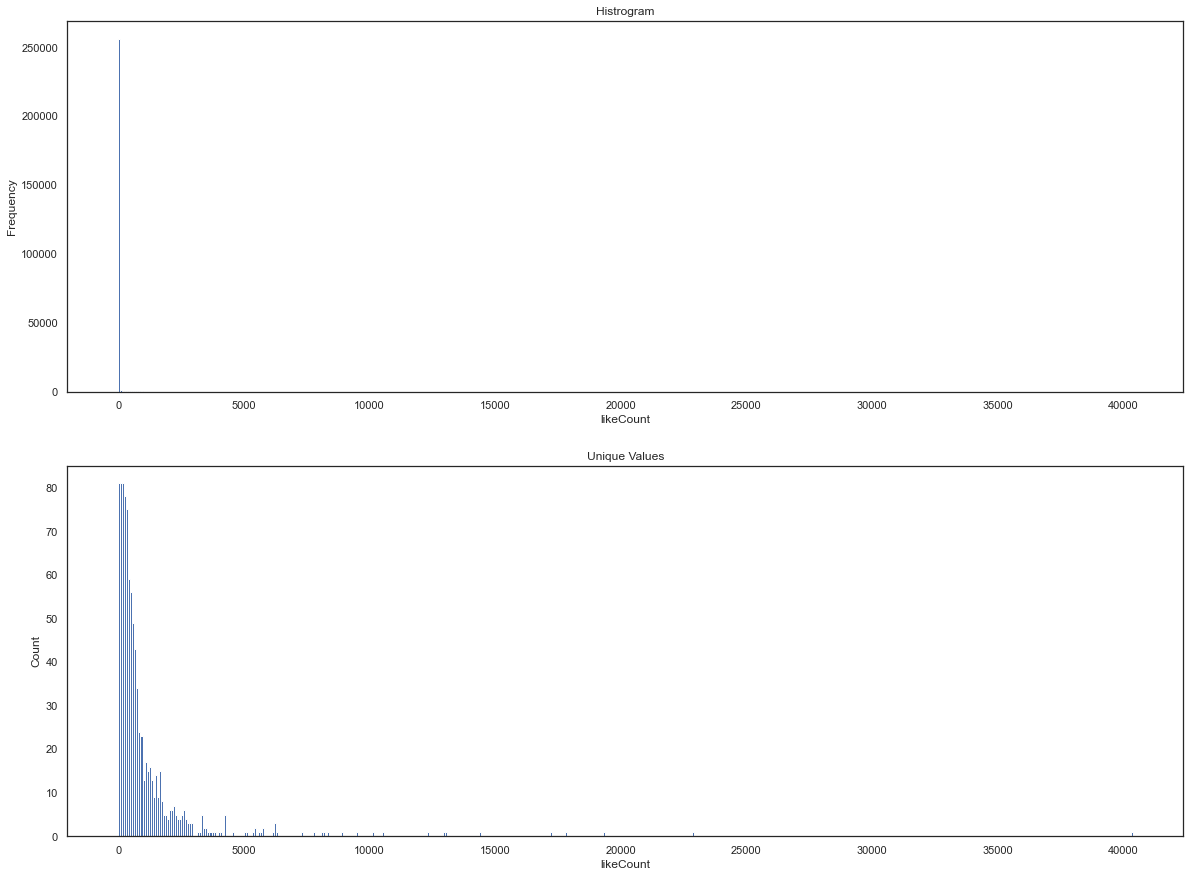

In [116]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20,15))
axs[0].hist(x=comments['likeCount'], bins=500)
axs[1].hist(x=comments['likeCount'].unique(), bins=500)
axs[0].set(title='Histrogram', ylabel='Frequency', xlabel='likeCount')
axs[1].set(title='Unique Values', ylabel='Count', xlabel='likeCount')

### Word Count Distribution

Using the same approach as discussed in the `likeCount` distribution there are two subplots to flush out any extreme values that would otherwise be hard to observe in the Raw histogram. It's clear that the majority of the comments lengths are quite short. Anything over roughly 750 characters can be considered an outlier.

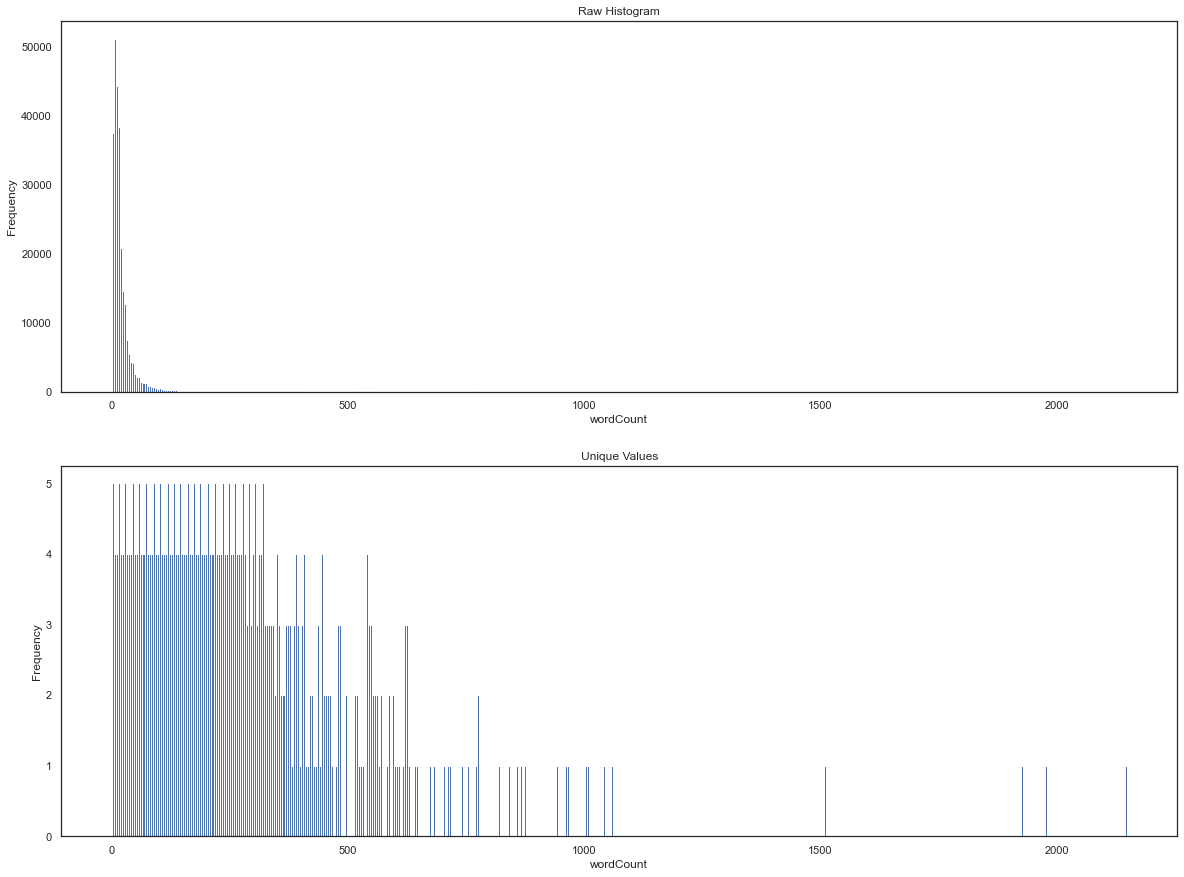

In [117]:
# comments.sample(5, random_state=0)
# comments.loc[:, 'characterCount'].plot.hist()
feature = 'wordCount'
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20,15))
axs[0].hist(x=comments[feature], bins=500)
axs[1].hist(x=comments[feature].unique(), bins=500)
axs[0].set(title='Raw Histogram', ylabel='Frequency', xlabel=feature)
nothing = axs[1].set(title='Unique Values', ylabel='Frequency', xlabel=feature)

### Sentiment Breakdown - Compound
* count: 259394 rows
* mean: 0.17 --> comments are mostly positive, central tendency has a slight positive offset from 0.0
* std: 0.38 --> indicates little dispersion
* 75%: 75th percentile. 75% of compound scores were less than 0.50 further confirming the center of the distribution favors neutral scores. 


In [118]:
comments.describe()

,likeCount,wordCount,neg,neu,pos,compound
count,258760.000000,258760.000000,258760.000000,258760.000000,258760.000000,258760.000000
mean,6.241452,19.260763,0.048663,0.802058,0.145754,0.172354
std,155.077070,28.761191,0.117060,0.223555,0.203970,0.389059
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,7.000000,0.000000,0.700000,0.000000,0.000000
50%,0.000000,12.000000,0.000000,0.800000,0.000000,0.000000
75%,0.000000,22.000000,0.000000,1.000000,0.200000,0.500000
max,40383.000000,2148.000000,1.000000,1.000000,1.000000,1.000000


### Sentiment Distribution

There is a clear concentration around 0 (neutral score), therefore, if we were to randomly sample a comment a neutral comment is most likely. The right half plane density is greater than the left half plane indicating positive comments are the second most likely to occur. 

Done.


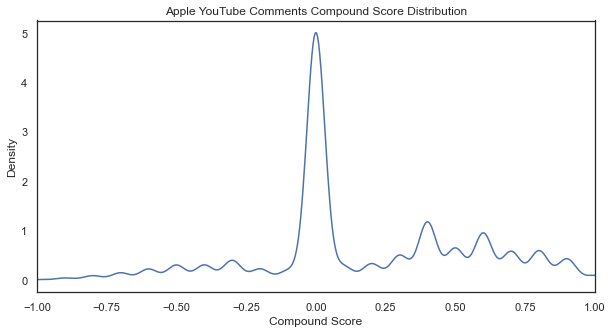

In [119]:
ax = comments['compound'].plot.density(label=company)
ax.set(xlabel='Compound Score', title=f'{company} YouTube Comments Compound Score Distribution')
ax.set_xlim([-1,1])
print('Done.')

### Sentiment Distribution with Neutral Comments removed

When the neutral comments are removed we're able to see distributions of positive vs negative comments. We can see that positive comments generally tend to be from .4 to .7 while negative comments tend to be around -.5 to -.25 indicating the comments to be more on the favorable side.

Done.


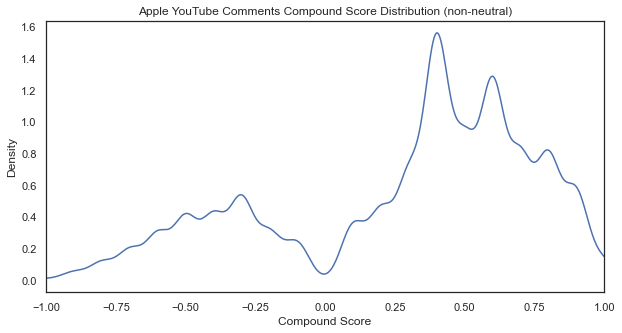

In [120]:
# Selecting only polar comments that aren't "neutral" (referring to compound scores outside of +- 0.5)
polar_comments = comments.loc[(comments['compound'] <= -0.05) | (comments['compound'] >= 0.05), :]

ax = polar_comments['compound'].plot.density(label=company)
ax.set(xlabel='Compound Score', title=f'{company} YouTube Comments Compound Score Distribution (non-neutral)')
ax.set_xlim([-1,1])
print('Done.')

### Term Frequency (TF)
Calculate how often a word appears with the goal of identifying the words of a text that are most informative about the company and products. The 30 most frequently used words within the DataFrame will be displayed here.

In [121]:
tf = dict()
pbar = tqdm(total=comments.shape[0])
for index, row in comments.iterrows():
    tokens = nltk.word_tokenize(row.textCleaned)
    for token in tokens:
        if token in tf:
            tf[token] += 1
        else:
            tf[token] = 1
    pbar.update()
pbar.close()

print('Sorting...')
tf = dict(sorted(tf.items(), key=lambda item: item[1], reverse=True))
print('Done.')



Sorting...
Done.


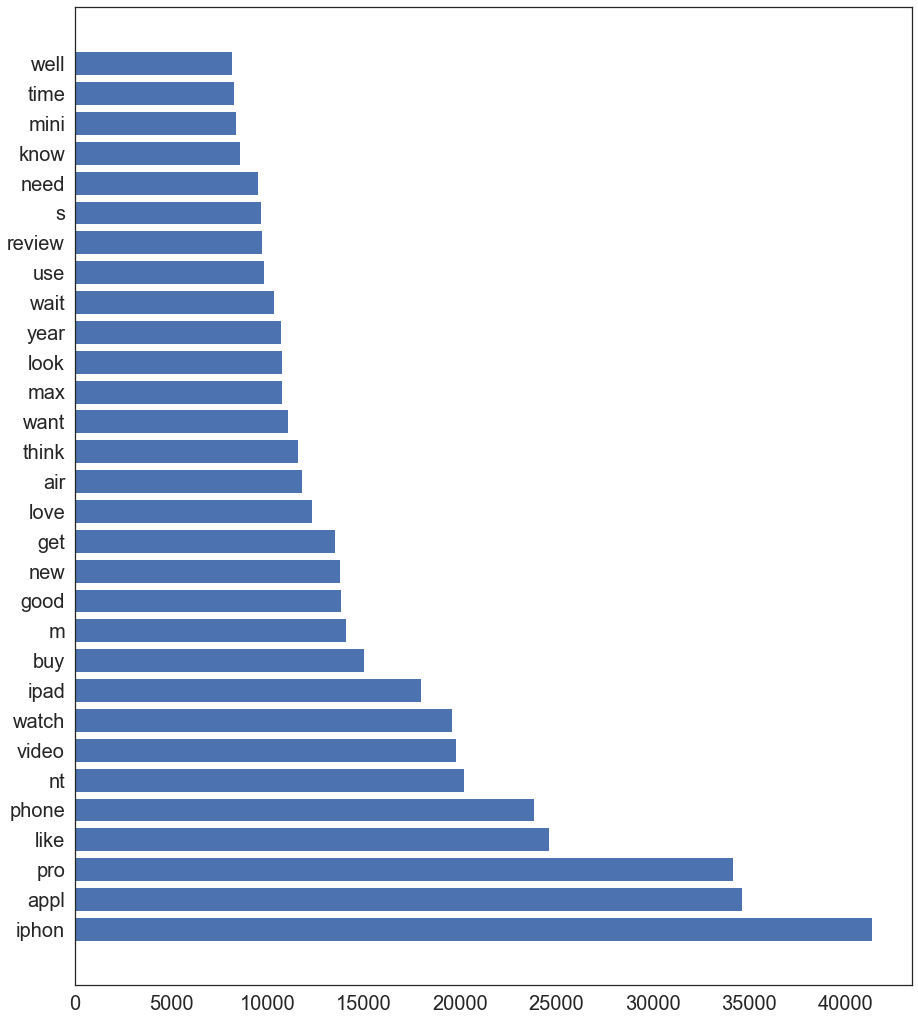

In [122]:
nterms = 30
x = list(tf.keys())[:nterms]
y = list(tf.values())[:nterms] # python 3.7 and greater retains dictionary order

fig, axs = plt.subplots(figsize=(15,18), constrained_layout=False)
axs.barh(y=x, width=y)
for label in axs.get_yticklabels(): # rotate timestamp ticks
    label.set_fontsize(20)
for label in axs.get_xticklabels(): # rotate timestamp ticks
    label.set_fontsize(20)

#### Plot Results:
From the top `nterms` (e.g. 50) it's clear that the majority of the comments are primarily focused around the phone/iPhone which would indicate that the mean sentiment would be a good measure of public opinion about the company. Furthere text filtering would improve this plot.

# Analyizing by Sentiment Polarity


## Sort Overall Comments into positive and negative dataframes.
Allows us to see the words that most frequently are said in positive and negative comments. 
Removed Nuetral comments because they give no feedback on how well the product is doing.

Negative comments have a compound score of less than or equal to -0.05.
Neutral comments have a compound score between -.05 and .05.
Postive comments have a compound score of more than or equal to 0.05.

In [123]:
comments_filtered = comments[comments['compound'] != 0.0]
pos_comments = comments_filtered[comments_filtered['compound'] >=.05]
neg_comments = comments_filtered[comments_filtered['compound'] <= -.05]

This plot reaffirms a left-skew within the data showing the most densely populated comments are within the ~.4 ~.65.

Text(0.5, 1.0, 'Distribution of Sentiment for Non-Neutral Comments')

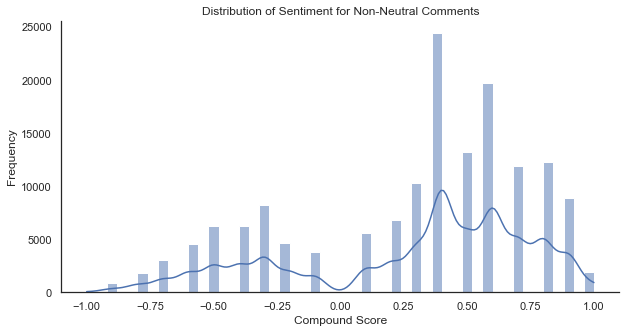

In [124]:
ax = sns.histplot(comments_filtered['compound'], bins = 50, kde = True)

sns.despine()
ax.set_xlabel('Compound Score')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Sentiment for Non-Neutral Comments')

### Overall Term Frequency of Positive comments across all products.

In [125]:
tf = dict()
pbar = tqdm(total=pos_comments.shape[0])
for index, row in pos_comments.iterrows():
    tokens = nltk.word_tokenize(row.textCleaned)
    for token in tokens:
        if token in tf:
            tf[token] += 1
        else:
            tf[token] = 1
    pbar.update()
pbar.close()

print('Sorting...')
tf = dict(sorted(tf.items(), key=lambda item: item[1], reverse=True))
print('Done.')



Sorting...
Done.


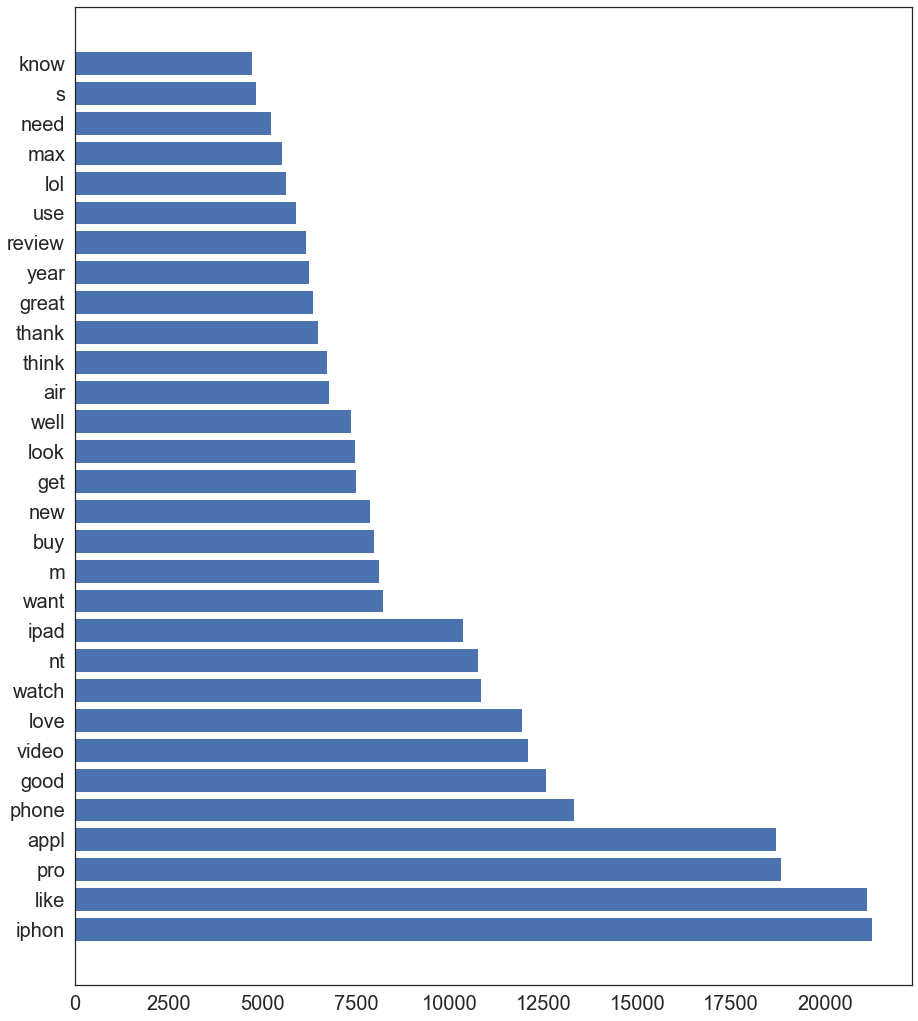

In [126]:
nterms = 30
x = list(tf.keys())[:nterms]
y = list(tf.values())[:nterms] # python 3.7 and greater retains dictionary order

fig, axs = plt.subplots(figsize=(15,18), constrained_layout=False)
axs.barh(y=x, width=y)
for label in axs.get_yticklabels(): # rotate timestamp ticks
    label.set_fontsize(20)
for label in axs.get_xticklabels(): # rotate timestamp ticks
    label.set_fontsize(20)

### Overall Term Frequency of Negative Comments across all products.

In [127]:
tf = dict()
pbar = tqdm(total=neg_comments.shape[0])
for index, row in neg_comments.iterrows():
    tokens = nltk.word_tokenize(row.textCleaned)
    for token in tokens:
        if token in tf:
            tf[token] += 1
        else:
            tf[token] = 1
    pbar.update()
pbar.close()

print('Sorting...')
tf = dict(sorted(tf.items(), key=lambda item: item[1], reverse=True))
print('Done.')


Sorting...
Done.


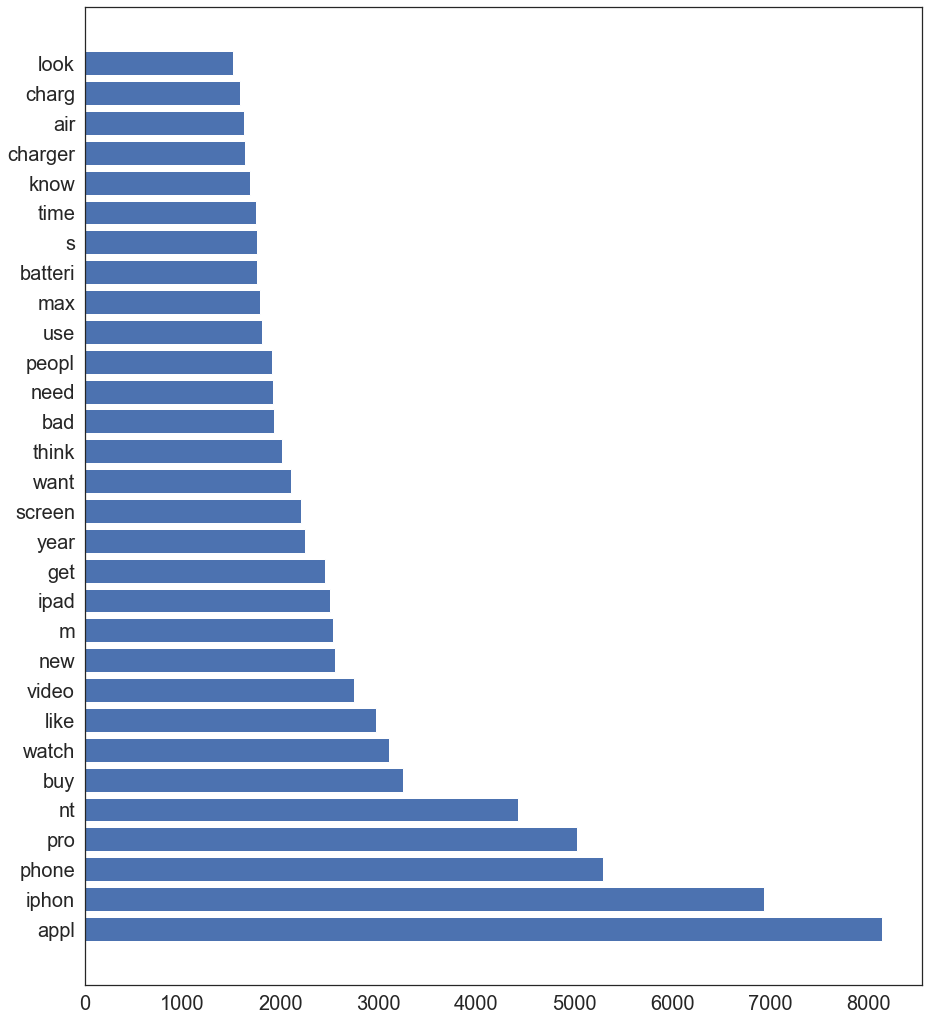

In [128]:
nterms = 30
x = list(tf.keys())[:nterms]
y = list(tf.values())[:nterms] # python 3.7 and greater retains dictionary order

fig, axs = plt.subplots(figsize=(15,18), constrained_layout=False)
axs.barh(y=x, width=y)
for label in axs.get_yticklabels(): # rotate timestamp ticks
    label.set_fontsize(20)
for label in axs.get_xticklabels(): # rotate timestamp ticks
    label.set_fontsize(20)

### Overall Positive and Negative Term Frequency Results

From a general point of view, this visualization demonstrates that the sentiment analysis is indeed capable of distinguishing positive and negative comments, which is visible in the minor differences between these two graphs. The positive TF chart includes words such as “love”, “want”, and “buy”, whereas the negative TF chart does not predominantly include those words, and instead holds more generic words, alongside terms such as “bad”. However, on their own, these charts don’t hold much merit for analysis, considering that the most frequently occurring words don’t have any emotional value, such as “like”, “iphone”, and “pro”.


# Individual Product Analysis

In order to make more sense of the data, we split the data frame into product sections that allow for us to get hot key-words behind each of the positive and negative comments.

## iPhone Analysis

Sentiment analysis for the iPhone is performed in this section. Additionally, term frequency–inverse document frequency (tf-idf) is done for a more accurate depiction of words utilized by Youtube users; in regards to this specific Apple product.

### Find `iPhone` related comments and seperate positive vs. negative comments to do TF-IDF.

In [129]:
prod = 'iPhone'
iphone_comments = comments.loc[comments['videoId'].isin(product_videos[prod]), :]

iphone_filtered = iphone_comments[iphone_comments['compound'] != 0.0]
iphone_pos = iphone_filtered[iphone_filtered['compound'] >=.05]
iphone_neg = iphone_filtered[iphone_filtered['compound'] <= -.05]

### Sentiment Distribution (iPhone)

The graph above portrays a majority of positive comments in regards to the iPhone. Positive sentiment accounts to a 78% of non-neutral comments.

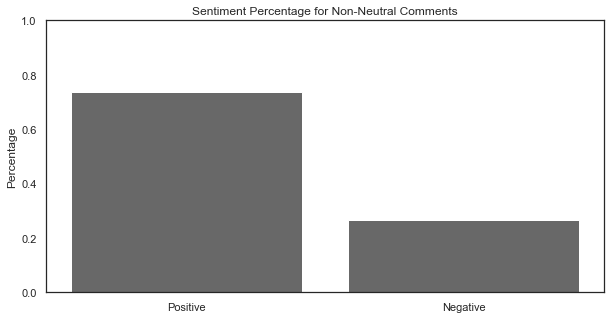

In [130]:
percent_pos = len(iphone_pos) / len(iphone_filtered)
percent_neg = len(iphone_neg) / len(iphone_filtered)

plt.bar(x = 0, height = percent_pos, width=1, bottom=None, align='center', data=None, color= '#686868')
plt.bar(x = 1.2, height = percent_neg, width=1, bottom=None, align='center', data=None, color= '#686868')

plt.title('Sentiment Percentage for Non-Neutral Comments')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1.2], labels=['Positive', 'Negative'])
plt.yticks(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

### Top 30 words mentioned in 57,335 positive comments relating to `iPhone` 12 series (12 mini, 12, 12 Pro, 12 Pro Max).

In [131]:
tf = dict()
pbar = tqdm(total=iphone_pos.shape[0])
for index, row in iphone_pos.iterrows():
    tokens = nltk.word_tokenize(row.textCleaned)
    for token in tokens:
        if token in tf:
            tf[token] += 1
        else:
            tf[token] = 1
    pbar.update()
pbar.close()

print('Sorting...')
tf = dict(sorted(tf.items(), key=lambda item: item[1], reverse=True))
print('Done.')


Sorting...
Done.


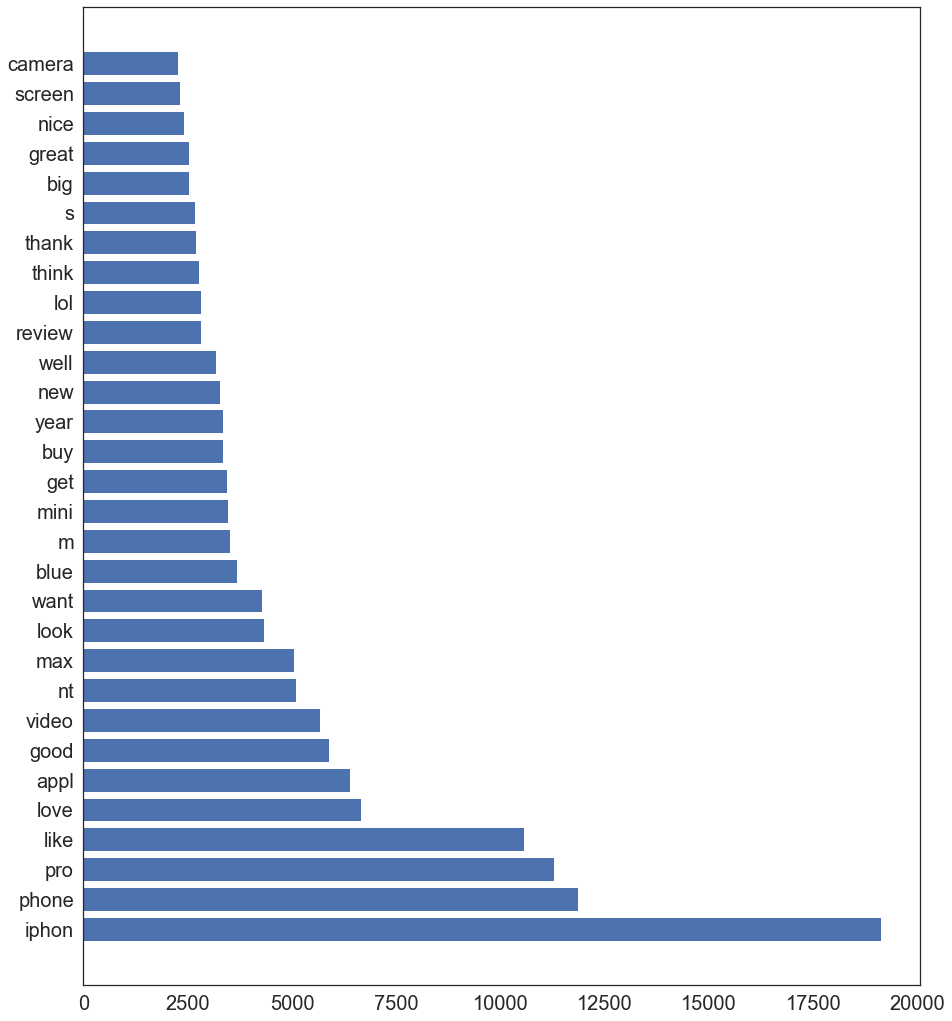

In [132]:
nterms = 30
x = list(tf.keys())[:nterms]
y = list(tf.values())[:nterms] # python 3.7 and greater retains dictionary order

fig, axs = plt.subplots(figsize=(15,18), constrained_layout=False)
axs.barh(y=x, width=y)
for label in axs.get_yticklabels(): # rotate timestamp ticks
    label.set_fontsize(20)
for label in axs.get_xticklabels(): # rotate timestamp ticks
    label.set_fontsize(20)

### Plot results:

This graph portrays the frequency of words reflecting a positive sentiment in regards to the iPhone 12 series. Top 50 words within YouTube comments include positive feedback that users consider outstanding of these particular Apple products.

### Top 30 words mentioned in 20,598 negative comments relating to `iPhone` 12 series (12 mini, 12, 12 Pro, 12 Pro Max).

In [133]:
tf = dict()
pbar = tqdm(total=iphone_neg.shape[0])
for index, row in iphone_neg.iterrows():
    tokens = nltk.word_tokenize(row.textCleaned)
    for token in tokens:
        if token in tf:
            tf[token] += 1
        else:
            tf[token] = 1
    pbar.update()
pbar.close()

print('Sorting...')
tf = dict(sorted(tf.items(), key=lambda item: item[1], reverse=True))
print('Done.')


Sorting...
Done.


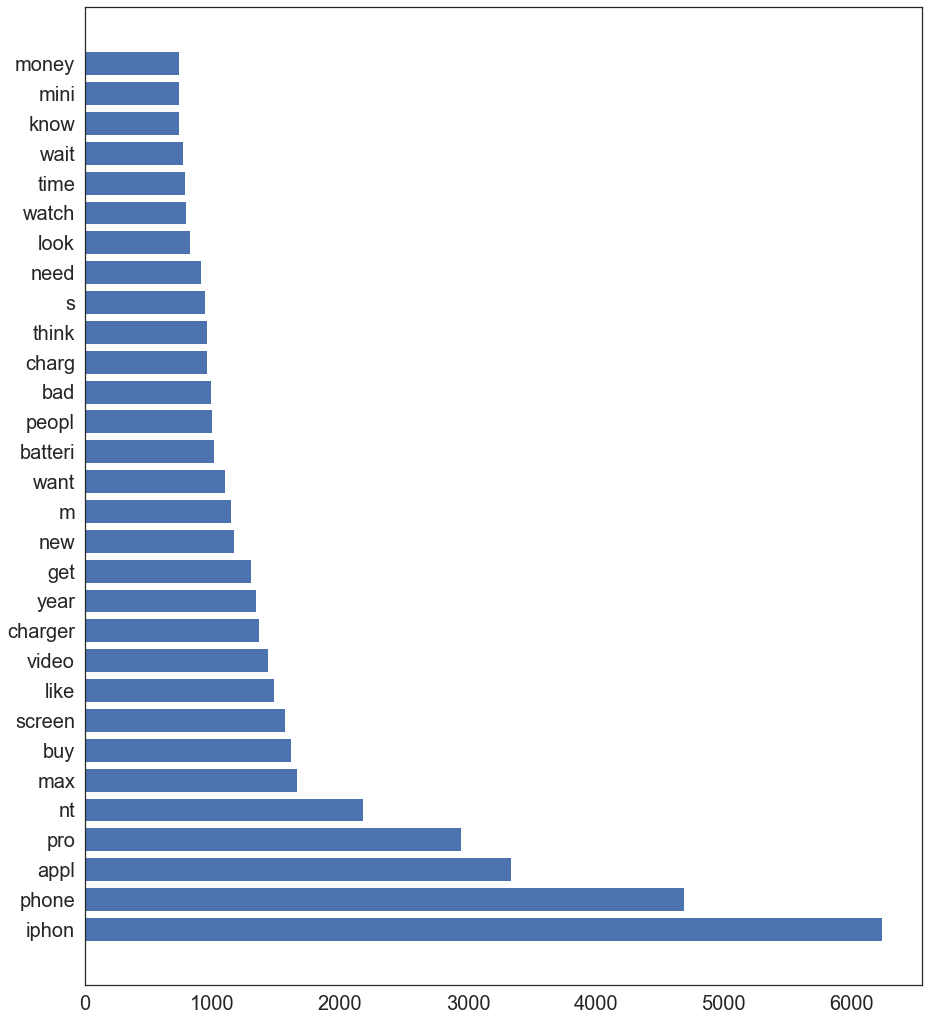

In [134]:
nterms = 30
x = list(tf.keys())[:nterms]
y = list(tf.values())[:nterms] # python 3.7 and greater retains dictionary order

fig, axs = plt.subplots(figsize=(15,18), constrained_layout=False)
axs.barh(y=x, width=y)
for label in axs.get_yticklabels(): # rotate timestamp ticks
    label.set_fontsize(20)
for label in axs.get_xticklabels(): # rotate timestamp ticks
    label.set_fontsize(20)

### Plot results:
The term frequency plot of negative comments about the iPhone 12 series depicts a similar trend that has been described previously in this document. These top 30 terms represent what is talked about by critics of the products series which can offer and insight into what consumers are most concerned with.

## Inverse Document Frequency (IDF)
Weights words by their relative frequency across positive and negative to find unique word trends that identify and categorize each word accordingly.

In [135]:
stop_words = set(stopwords.words('english'))
tfidf = TfidfVectorizer(sublinear_tf=True,
                        analyzer='word',
                        max_features=100,
                        tokenizer=word_tokenize,
                        stop_words=stop_words)

In [136]:
negative_iphone = iphone_neg['textOriginal'].to_list()
positive_iphone = iphone_pos['textOriginal'].to_list()

# lowercase text
negative = list(map(str.lower, negative_iphone))
positive = list(map(str.lower, positive_iphone))

# remove punctuation
for c in string.punctuation:
    negative = str(negative).replace(c, "")
    positive = str(positive).replace(c, "")

# get list of two documents together
corpus = [str(negative), str(positive)]

In [137]:
iphone_tfidf = pd.DataFrame(tfidf.fit_transform(corpus).toarray())
iphone_tfidf.columns = tfidf.get_feature_names()
iphone_tfidf = iphone_tfidf.rename(index={0:'Negative', 1:'Positive'})

In [138]:
keep_cols = set(iphone_tfidf.columns.to_list()) - set(['apple', 'see', 'iphone', 'gon', '’','phone','”','“', '12', 'one', 'like', 'get', 'im', 'new', 'dont', 'still', 'phones', 'really', 'want', 'even', 'would', 'need', 'much', 'next', 'go' , 'going', 'every', 'back', 'iphones', 'getting', 'also', 'good', 'life', 'thing', 'way', 'thats', 'give', 'got', 'think', 'know', 'cant', 'make', 'na', 'use', 'u', 'lol', 'pro', 'max', 'please','video', 'best', 'review', 'time' ])
iphone_tfidf = iphone_tfidf.loc[:, keep_cols]

In [139]:
most_unique = iphone_tfidf.idxmax(axis=1) 
most_unique

Negative    screen
Positive      love
dtype: object

In [140]:
tpose = iphone_tfidf.transpose()
tpose['Compound'] = tpose['Positive'] - tpose['Negative']

In [141]:
pos_idf = tpose.loc[tpose.Compound > 0, :]
neg_idf = tpose.loc[tpose.Compound <0, :]

### Top positive terms used associated with iPhone.

In this table we can see that the most positively associated terms with the latest iphone have to do with the appearance of the device, namely its latest color options. The size of the device also seems to have a positive impact, possibly referring to the release of the mini variant. Other terms in this table also describe the desire to upgrade, and affection towards the device, indicating that this analysis is being run accurately.

In [142]:
pos_idf.sort_values(by = 'Compound',ascending = False)['Compound'].head(15)

love       0.029907
great      0.026999
nice       0.025860
thanks     0.023780
pacific    0.018093
wish       0.017997
better     0.013488
blue       0.013006
gold       0.012260
color      0.011850
well       0.009580
looks      0.008103
videos     0.006272
size       0.005645
look       0.004283
Name: Compound, dtype: float64

### Top negative terms used associated with iPhone.

Based on these complaints, expectations on the next generation of the iPhone portray a negative sentiment. Given the top negative terms associated with the iPhone, it can be inferred that criticism towards Apple is based on their reforms for the sake of the environment. Although Apple has removed their chargers for said purpose, consumers’ satisfaction is low as a result. Other criticisms of the device range from the implementation of 5g, to other hardware specifications such as the quality of the screen, camera, and battery life.

In [143]:
neg_idf.sort_values(by = 'Compound',ascending = True)['Compound'].head(15)

13         -0.016831
charger    -0.013347
screen     -0.012237
box        -0.011323
charging   -0.010629
plus       -0.009030
money      -0.008727
people     -0.007868
battery    -0.007867
buy        -0.007164
5g         -0.006666
year       -0.005456
price      -0.005240
wait       -0.004911
never      -0.003682
Name: Compound, dtype: float64

## iPad Analysis
Sentiment analysis for the iPad is performed in this section. Additionally, term frequency–inverse document frequency (tf-idf) is done for a more accurate depiction of words utilized by Youtube users; in regards to this specific Apple product.

### Find `iPad` related comments and seperate positive vs. negative comments to do TF-IDF.

In [144]:
prod = 'iPad'
ipad_comments = comments.loc[comments['videoId'].isin(product_videos[prod]), :]

ipad_filtered = ipad_comments[ipad_comments['compound'] != 0.0]
ipad_pos = ipad_filtered[ipad_filtered['compound'] >=.05]
ipad_neg = ipad_filtered[ipad_filtered['compound'] <= -.05]

### Sentiment Distribution (iPad)

The graph above portrays a majority of positive comments in regards to the iPad. Positive sentiment accounts to an 80% of non-neutral comments.

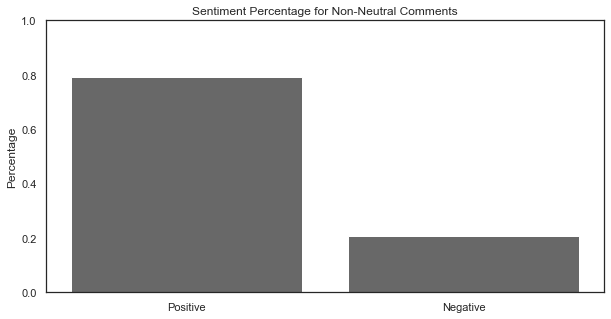

In [145]:
percent_pos = len(ipad_pos) / len(ipad_filtered)
percent_neg = len(ipad_neg) / len(ipad_filtered)

plt.bar(x = 0, height = percent_pos, width=1, bottom=None, align='center', data=None, color= '#686868')
plt.bar(x = 1.2, height = percent_neg, width=1, bottom=None, align='center', data=None, color= '#686868')

plt.title('Sentiment Percentage for Non-Neutral Comments')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1.2], labels=['Positive', 'Negative'])
plt.yticks(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

### Top 30 words mentioned in 16,769 positive comments relating to iPad Air 4th Gen and iPad.

In [146]:
tf = dict()
pbar = tqdm(total=ipad_pos.shape[0])
for index, row in ipad_pos.iterrows():
    tokens = nltk.word_tokenize(row.textCleaned)
    for token in tokens:
        if token in tf:
            tf[token] += 1
        else:
            tf[token] = 1
    pbar.update()
pbar.close()

print('Sorting...')
tf = dict(sorted(tf.items(), key=lambda item: item[1], reverse=True))
print('Done.')


Sorting...
Done.


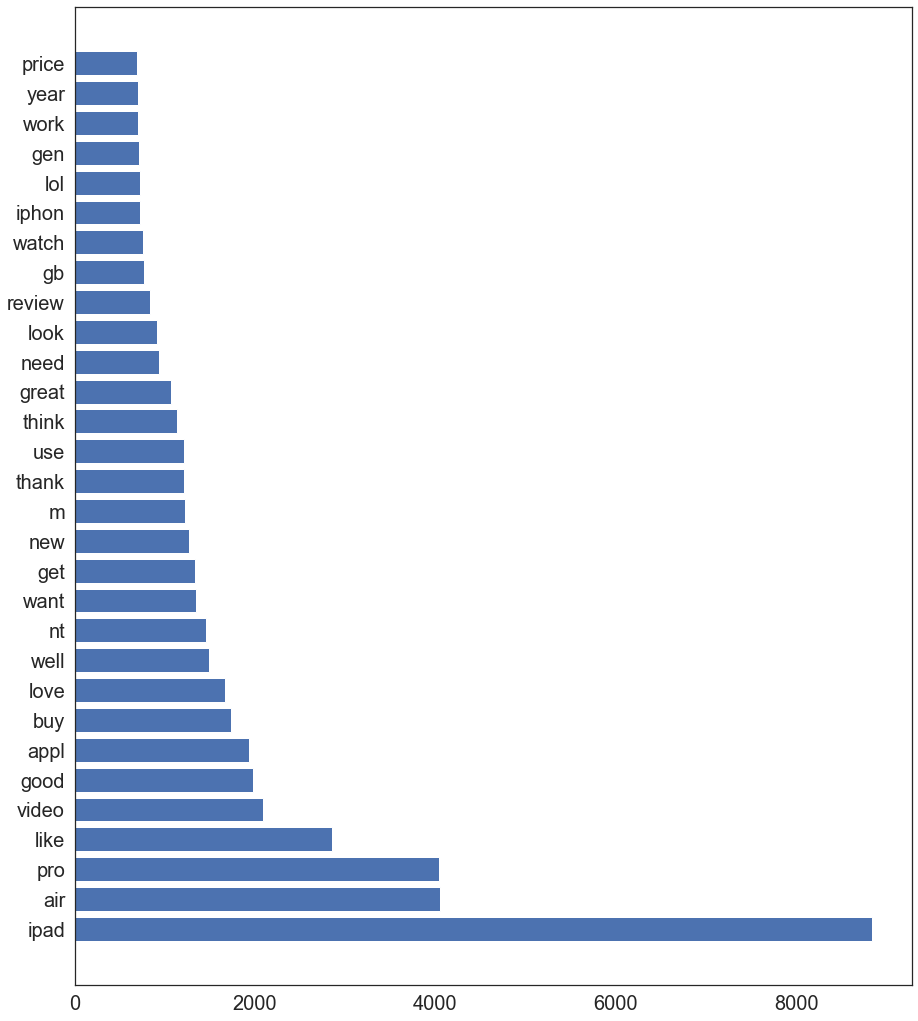

In [147]:
nterms = 30
x = list(tf.keys())[:nterms]
y = list(tf.values())[:nterms] # python 3.7 and greater retains dictionary order

fig, axs = plt.subplots(figsize=(15,18), constrained_layout=False)
axs.barh(y=x, width=y)
for label in axs.get_yticklabels(): # rotate timestamp ticks
    label.set_fontsize(20)
for label in axs.get_xticklabels(): # rotate timestamp ticks
    label.set_fontsize(20)

### Top 30 words mentioned in 4,375 negative comments relating to iPad Air 4th Gen and iPad.

In [148]:
tf = dict()
pbar = tqdm(total=ipad_neg.shape[0])
for index, row in ipad_neg.iterrows():
    tokens = nltk.word_tokenize(row.textCleaned)
    for token in tokens:
        if token in tf:
            tf[token] += 1
        else:
            tf[token] = 1
    pbar.update()
pbar.close()

print('Sorting...')
tf = dict(sorted(tf.items(), key=lambda item: item[1], reverse=True))
print('Done.')


Sorting...
Done.


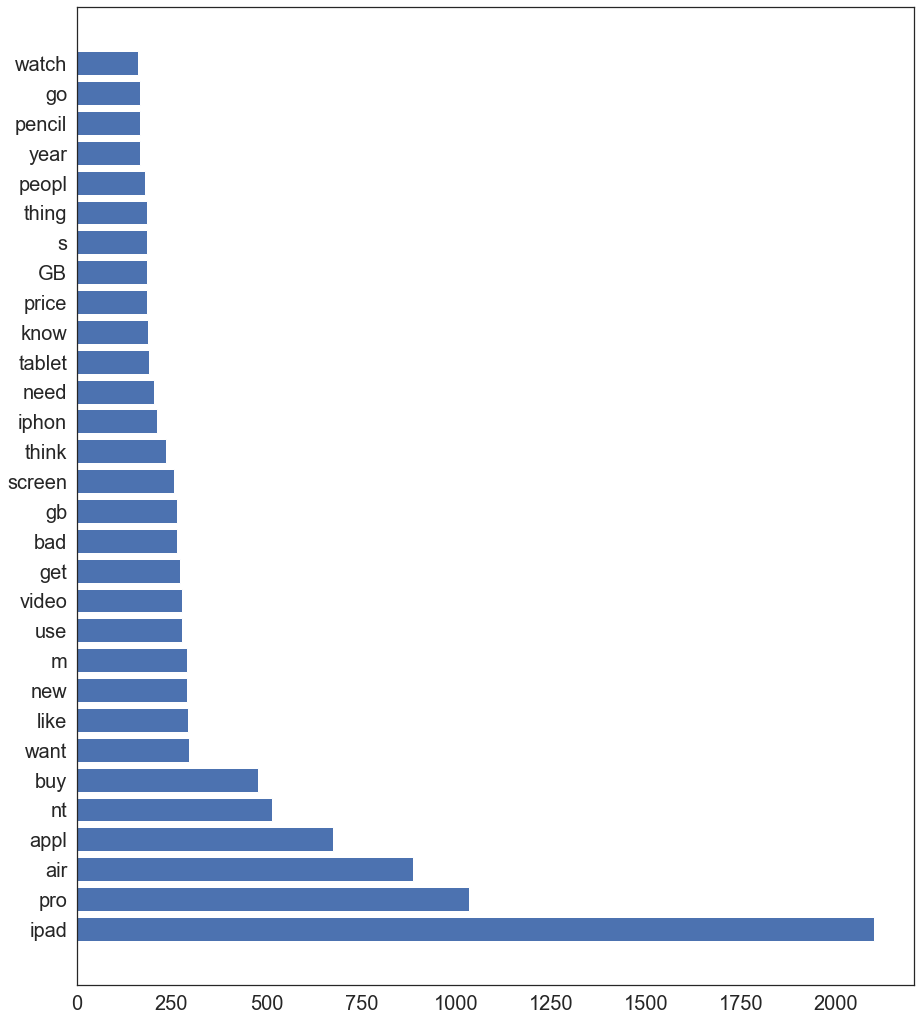

In [149]:
nterms = 30
x = list(tf.keys())[:nterms]
y = list(tf.values())[:nterms] # python 3.7 and greater retains dictionary order

fig, axs = plt.subplots(figsize=(15,18), constrained_layout=False)
axs.barh(y=x, width=y)
for label in axs.get_yticklabels(): # rotate timestamp ticks
    label.set_fontsize(20)
for label in axs.get_xticklabels(): # rotate timestamp ticks
    label.set_fontsize(20)

### Inverse Document Frequency (IDF)¶
Weights words by their relative frequency across positive and negative to find unique word trends that identify and categorize each word accordingly.

In [150]:
stop_words = set(stopwords.words('english'))
tfidf = TfidfVectorizer(sublinear_tf=True,
                        analyzer='word',
                        max_features=200,
                        tokenizer=word_tokenize,
                        stop_words=stop_words)

In [151]:
negative_ipad = ipad_neg['textOriginal'].to_list()
positive_ipad = ipad_pos['textOriginal'].to_list()

# lowercase text
negative = list(map(str.lower, negative_ipad))
positive = list(map(str.lower, positive_ipad))

# remove punctuation
for c in string.punctuation:
    negative = str(negative).replace(c, "")
    positive = str(positive).replace(c, "")

# get list of two documents together
corpus = [str(negative), str(positive)]

In [152]:
ipad_tfidf = pd.DataFrame(tfidf.fit_transform(corpus).toarray())
ipad_tfidf.columns = tfidf.get_feature_names()
ipad_tfidf = ipad_tfidf.rename(index={0:'Negative', 1:'Positive'})

In [153]:
keep_cols = set(ipad_tfidf.columns.to_list()) - set(['apple', 'iphone', 'ipad', '’','phone', 'air', '”','“', '12', 'one', 'like', 'get', 'im', 'new', 'dont', 'could', 'still', 'phones', 'really', 'want', 'even', 'would', 'need', 'much', 'next', 'go' , 'going', 'every', 'back', 'iphones', 'getting', 'also', 'good', 'life', 'thing', 'way', 'thats', 'give', 'got', 'think', 'know', 'cant', 'make', 'na', 'use', 'u', 'lol', 'pro', 'please','video', 'best', 'review', 'time', '4,', 'buy', 'id', 'people', 'using', 'see', '8', '8th', 'always' , 'bought', '2020', 'year', '3', '11', 'lot', 'thanks' ])
ipad_tfidf = ipad_tfidf.loc[:, keep_cols]

In [154]:
most_unique = ipad_tfidf.idxmax(axis=1) 
most_unique

Negative    screen
Positive      love
dtype: object

In [155]:
tpose = ipad_tfidf.transpose()
tpose['Compound'] = tpose['Positive'] - tpose['Negative']


pos_idf = tpose.loc[tpose.Compound > 0, :]
neg_idf = tpose.loc[tpose.Compound <0, :]


### Top Postive unique terms used assosciated with iPad 4th Gen and iPad Air.

Positively associated terms with the ipad don’t produce any productive insights, all we are able to conclude is that positive comments predominantly included positive terms in their reviews.

In [156]:
pos_idf.sort_values(by = 'Compound',ascending = False)['Compound'].head(15)

awesome       0.054590
love          0.030532
amazing       0.028437
nice          0.028368
wow           0.027699
thank         0.023529
pretty        0.022858
hope          0.022282
recommend     0.022065
great         0.021001
cool          0.020540
help          0.019427
definitely    0.019157
yes           0.015242
happy         0.014785
Name: Compound, dtype: float64

### Top negative unique terms used assosciated with iPad 4th Gen and iPad Air.

From the negatively associated terms with the ipad 4 and Air, we are able to observe that criticisms largely included disdain for the screen of the device, especially its lack of a 120hz refresh rate, and something to do with “touch”, which might involve a criticism of the responsiveness of the device’s touch response.

In [157]:
neg_idf.sort_values(by = 'Compound',ascending = True)['Compound'].head(10)

bad       -0.025172
screen    -0.011014
face      -0.010088
doesnt    -0.009996
touch     -0.008391
never     -0.007367
said      -0.006333
5         -0.006017
120hz     -0.005880
samsung   -0.005862
Name: Compound, dtype: float64

# Macbook Analysis
Sentiment analysis for the Macbook is performed in this section. Additionally, term frequency–inverse document frequency (tf-idf) is done for a more accurate depiction of words utilized by Youtube users; in regards to this specific Apple product.

### Find Macbook related comments and seperate positive vs. negative comments to do TF-IDF.

In [158]:
prod = 'Macbook'
mac_comments = comments.loc[comments['videoId'].isin(product_videos[prod]), :]

mac_filtered = mac_comments[mac_comments['compound'] != 0.0]
mac_pos = mac_filtered[mac_filtered['compound'] >=.05]
mac_neg = mac_filtered[mac_filtered['compound'] <= -.05]

## Sentiment Distribution (Macbook)

The graph above portrays a majority of positive comments in regards to the Macbook. Positive sentiment accounts to a 70% of non-neutral comments.

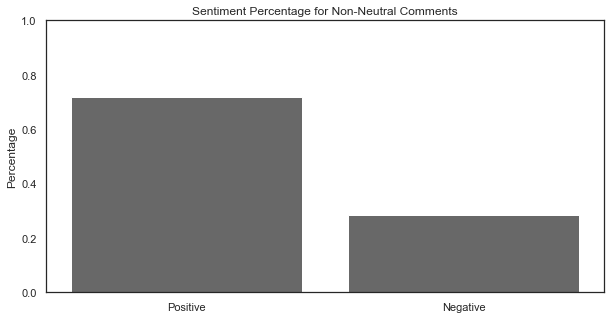

In [159]:
percent_pos = len(mac_pos) / len(mac_filtered)
percent_neg = len(mac_neg) / len(mac_filtered)

plt.bar(x = 0, height = percent_pos, width=1, bottom=None, align='center', data=None, color= '#686868')
plt.bar(x = 1.2, height = percent_neg, width=1, bottom=None, align='center', data=None, color= '#686868')

plt.title('Sentiment Percentage for Non-Neutral Comments')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1.2], labels=['Positive', 'Negative'])
plt.yticks(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

### Top 30 words mentioned in 23,462 positive comments relating to new Mac M1 line including Macbook pro, Macbook Air and Mac Mini.

In [160]:
tf = dict()
pbar = tqdm(total=mac_pos.shape[0])
for index, row in mac_pos.iterrows():
    tokens = nltk.word_tokenize(row.textCleaned)
    for token in tokens:
        if token in tf:
            tf[token] += 1
        else:
            tf[token] = 1
    pbar.update()
pbar.close()

print('Sorting...')
tf = dict(sorted(tf.items(), key=lambda item: item[1], reverse=True))
print('Done.')


Sorting...
Done.


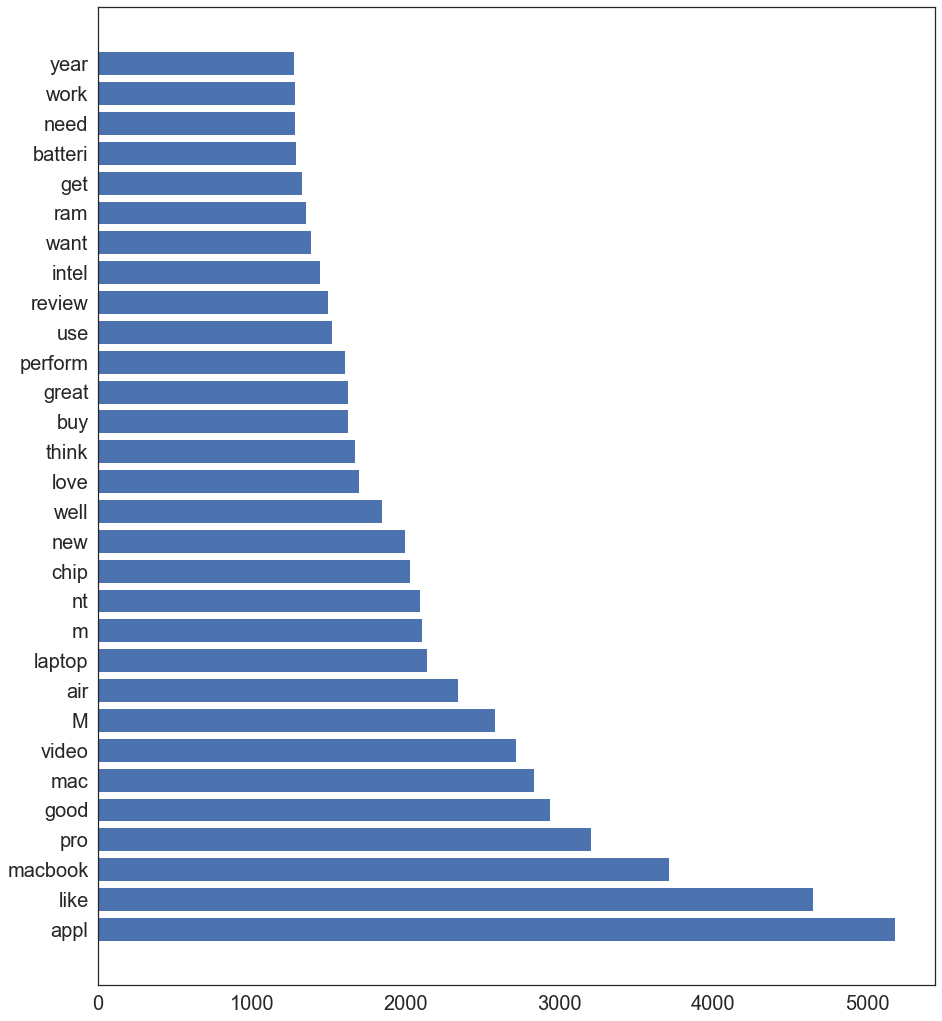

In [161]:
nterms = 30
x = list(tf.keys())[:nterms]
y = list(tf.values())[:nterms] # python 3.7 and greater retains dictionary order

fig, axs = plt.subplots(figsize=(15,18), constrained_layout=False)
axs.barh(y=x, width=y)
for label in axs.get_yticklabels(): # rotate timestamp ticks
    label.set_fontsize(20)
for label in axs.get_xticklabels(): # rotate timestamp ticks
    label.set_fontsize(20)

### Top 30 words mentioned in 9,265 negative comments relating to new Mac M1 line including Macbook pro, Macbook Air and Mac Mini.

In [162]:
tf = dict()
pbar = tqdm(total=mac_neg.shape[0])
for index, row in mac_neg.iterrows():
    tokens = nltk.word_tokenize(row.textCleaned)
    for token in tokens:
        if token in tf:
            tf[token] += 1
        else:
            tf[token] = 1
    pbar.update()
pbar.close()

print('Sorting...')
tf = dict(sorted(tf.items(), key=lambda item: item[1], reverse=True))
print('Done.')


Sorting...
Done.


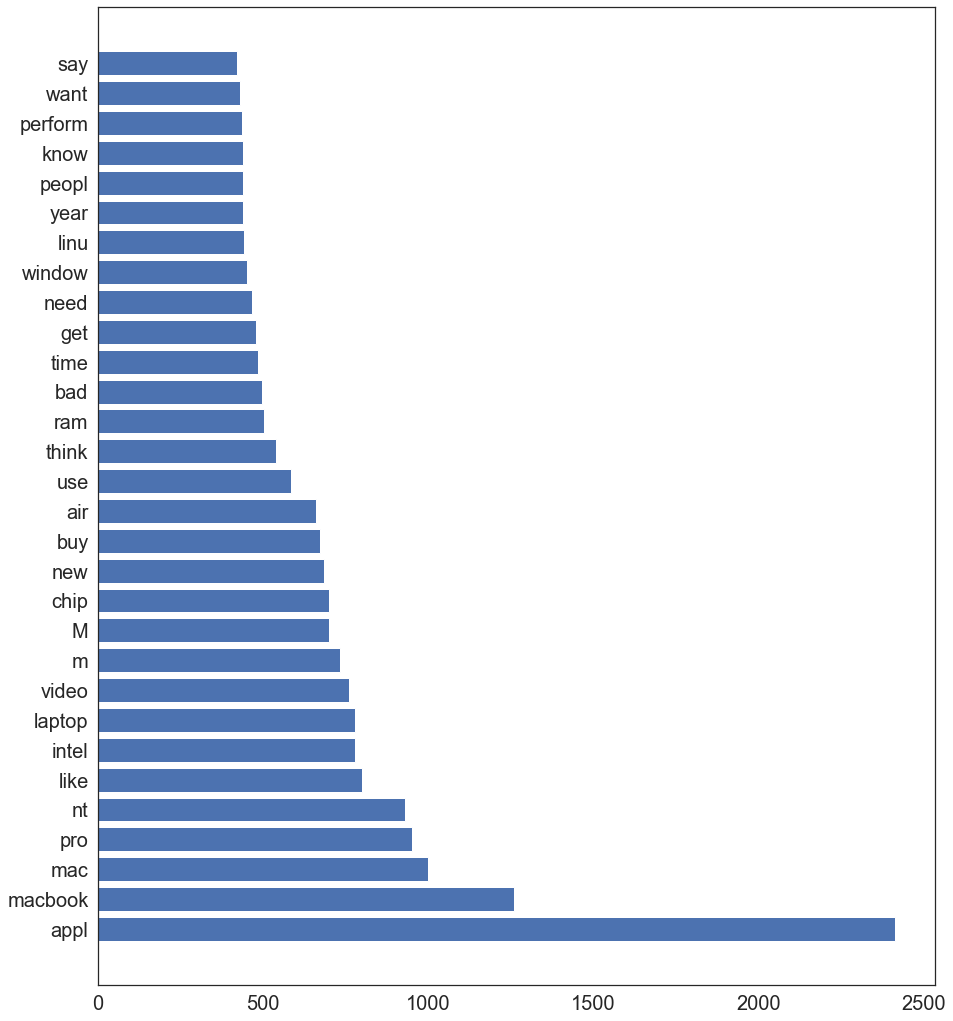

In [163]:
nterms = 30
x = list(tf.keys())[:nterms]
y = list(tf.values())[:nterms] # python 3.7 and greater retains dictionary order

fig, axs = plt.subplots(figsize=(15,18), constrained_layout=False)
axs.barh(y=x, width=y)
for label in axs.get_yticklabels(): # rotate timestamp ticks
    label.set_fontsize(20)
for label in axs.get_xticklabels(): # rotate timestamp ticks
    label.set_fontsize(20)

### Inverse Document Frequency (IDF)¶
Weights words by their relative frequency across positive and negative to find unique word trends that identify and categorize each word accordingly.

In [164]:
stop_words = set(stopwords.words('english'))
tfidf = TfidfVectorizer(sublinear_tf=True,
                        analyzer='word',
                        max_features=200,
                        tokenizer=word_tokenize,
                        stop_words=stop_words)

In [165]:
negative_mac = mac_neg['textOriginal'].to_list()
positive_mac = mac_pos['textOriginal'].to_list()

# lowercase text
negative = list(map(str.lower, negative_mac))
positive = list(map(str.lower, positive_mac))

# remove punctuation
for c in string.punctuation:
    negative = str(negative).replace(c, "")
    positive = str(positive).replace(c, "")

# get list of two documents together
corpus = [str(negative), str(positive)]

In [166]:
mac_tfidf = pd.DataFrame(tfidf.fit_transform(corpus).toarray())
mac_tfidf.columns = tfidf.get_feature_names()
mac_tfidf = mac_tfidf.rename(index={0:'Negative', 1:'Positive'})

In [167]:
keep_cols = set(mac_tfidf.columns.to_list()) - set(['apple', 'macbook', 'mac', 'm1', 'better', 'great', 'iphone', 'ipad', '’','phone', 'air', '”','“', '12', 'one', 'like', 'get', 'im', 'new', 'dont', 'could', 'still', 'phones', 'really', 'want', 'even', 'would', 'need', 'much', 'next', 'go' , 'going', 'every', 'back', 'iphones', 'getting', 'also', 'good', 'life', 'thing', 'way', 'thats', 'give', 'got', 'think', 'know', 'cant', 'make', 'na', 'use', 'u', 'lol', 'pro', 'please','video', 'best', 'review', 'time', '4,', 'buy', 'id', 'people', 'using', 'see', '8', '8th', 'always' , 'bought', '2020', 'year', '3', '11', 'lot', 'thanks' ])
mac_tfidf = mac_tfidf.loc[:, keep_cols]

In [168]:
most_unique = mac_tfidf.idxmax(axis=1) 
most_unique

Negative     intel
Positive    laptop
dtype: object

In [169]:
tpose = mac_tfidf.transpose()
tpose['Compound'] = tpose['Positive'] - tpose['Negative']


pos_idf = tpose.loc[tpose.Compound > 0, :]
neg_idf = tpose.loc[tpose.Compound <0, :]


### Top Positive terms used associated with Mac.

The list above includes words with a positive sentiment, in context to the Apple Macbook product. Most of the terms reflect a positive and surprised reaction; portraying a good reaction to the inclusion of the new M1 process to this product lineup.

In [170]:
pos_idf.sort_values(by = 'Compound',ascending = False)['Compound'].head(15)

wow        0.024158
love       0.024027
thank      0.023727
amazing    0.019083
hope       0.017710
nice       0.015572
excited    0.015428
pretty     0.012961
yes        0.012166
intro      0.007707
looks      0.006782
well       0.006629
yeah       0.006210
editing    0.004311
videos     0.003965
Name: Compound, dtype: float64

### Top Negative terms used associated with Mac.

Negatively associated terms with the Macbook indicate that many didn’t like the transition away from the intel / amd64 (64 bit) platform. The lack of ports, price of the product, and quality of the screen also seem to be a feature of negative reviews. On top of that, Linus Sebastian, who is a well known reviewer of Apple products, also seems to be commonly brought up. This may be due to the selection bias of our dataset, but still speaks poorly of the quality of his Apple reviews.

In [171]:
neg_idf.sort_values(by = 'Compound',ascending = True)['Compound'].head(15)

bad        -0.018576
linus      -0.008894
doesnt     -0.008428
intel      -0.007555
didnt      -0.007006
4          -0.006918
ports      -0.006194
touch      -0.006130
reason     -0.005846
screen     -0.005837
money      -0.005306
products   -0.005287
last       -0.005206
amd        -0.004735
big        -0.004409
Name: Compound, dtype: float64

# Apple Watch Analysis
Sentiment analysis for the Apple watch is performed in this section. Additionally, term frequency–inverse document frequency (tf-idf) is done for a more accurate depiction of words utilized by Youtube users; in regards to this specific Apple product.

In [172]:
prod = 'Watch'
watch_comments = comments.loc[comments['videoId'].isin(product_videos[prod]), :]

watch_filtered = watch_comments[watch_comments['compound'] != 0.0]
watch_pos = watch_filtered[watch_filtered['compound'] >=.05]
watch_neg = watch_filtered[watch_filtered['compound'] <= -.05]

## Sentiment Distribution (Apple Watch)

The graph above portrays a majority of positive comments in regards to the Apple Watch. Positive sentiment accounts to a 78% of non-neutral comments.

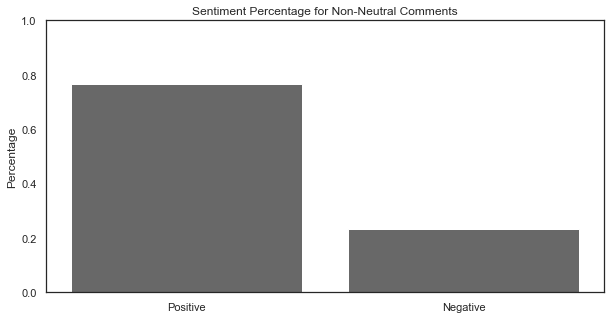

In [173]:
percent_pos = len(watch_pos) / len(watch_filtered)
percent_neg = len(watch_neg) / len(watch_filtered)

plt.bar(x = 0, height = percent_pos, width=1, bottom=None, align='center', data=None, color= '#686868')
plt.bar(x = 1.2, height = percent_neg, width=1, bottom=None, align='center', data=None, color= '#686868')

plt.title('Sentiment Percentage for Non-Neutral Comments')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1.2], labels=['Positive', 'Negative'])
plt.yticks(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

### Top 30 words mentioned in 17,280 positive comments relating to Watch Series 6.

In [174]:
tf = dict()
pbar = tqdm(total = watch_pos.shape[0])
for index, row in watch_pos.iterrows():
    tokens = nltk.word_tokenize(row.textCleaned)
    for token in tokens:
        if token in tf:
            tf[token] += 1
        else:
            tf[token] = 1
    pbar.update()
pbar.close()

print('Sorting...')
tf = dict(sorted(tf.items(), key=lambda item: item[1], reverse=True))
print('Done.')


Sorting...
Done.


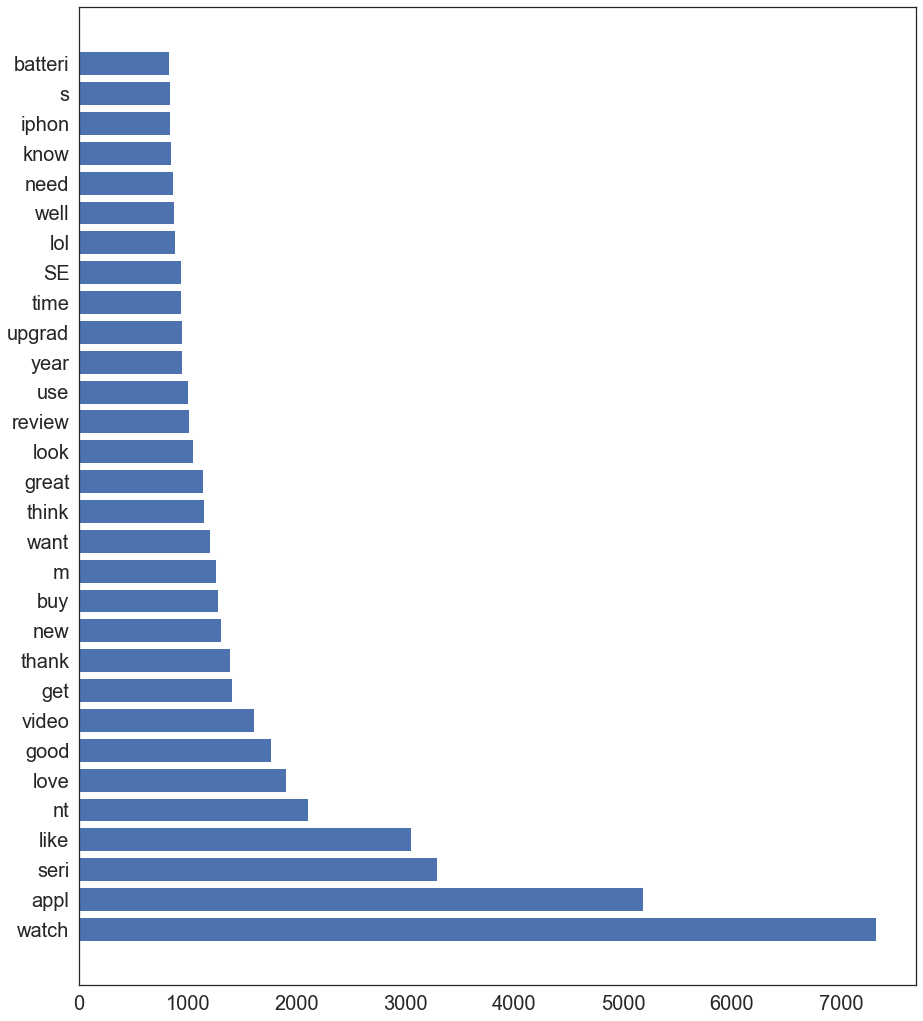

In [175]:
nterms = 30
x = list(tf.keys())[:nterms]
y = list(tf.values())[:nterms] # python 3.7 and greater retains dictionary order

fig, axs = plt.subplots(figsize=(15,18), constrained_layout=False)
axs.barh(y=x, width=y)
for label in axs.get_yticklabels(): # rotate timestamp ticks
    label.set_fontsize(20)
for label in axs.get_xticklabels(): # rotate timestamp ticks
    label.set_fontsize(20)

### Top 30 words mentioned in 5,237 negative comments relating to Apple Watch Series 6.

In [176]:
tf = dict()
pbar = tqdm(total = watch_neg.shape[0])
for index, row in watch_neg.iterrows():
    tokens = nltk.word_tokenize(row.textCleaned)
    for token in tokens:
        if token in tf:
            tf[token] += 1
        else:
            tf[token] = 1
    pbar.update()
pbar.close()

print('Sorting...')
tf = dict(sorted(tf.items(), key=lambda item: item[1], reverse=True))
print('Done.')


Sorting...
Done.


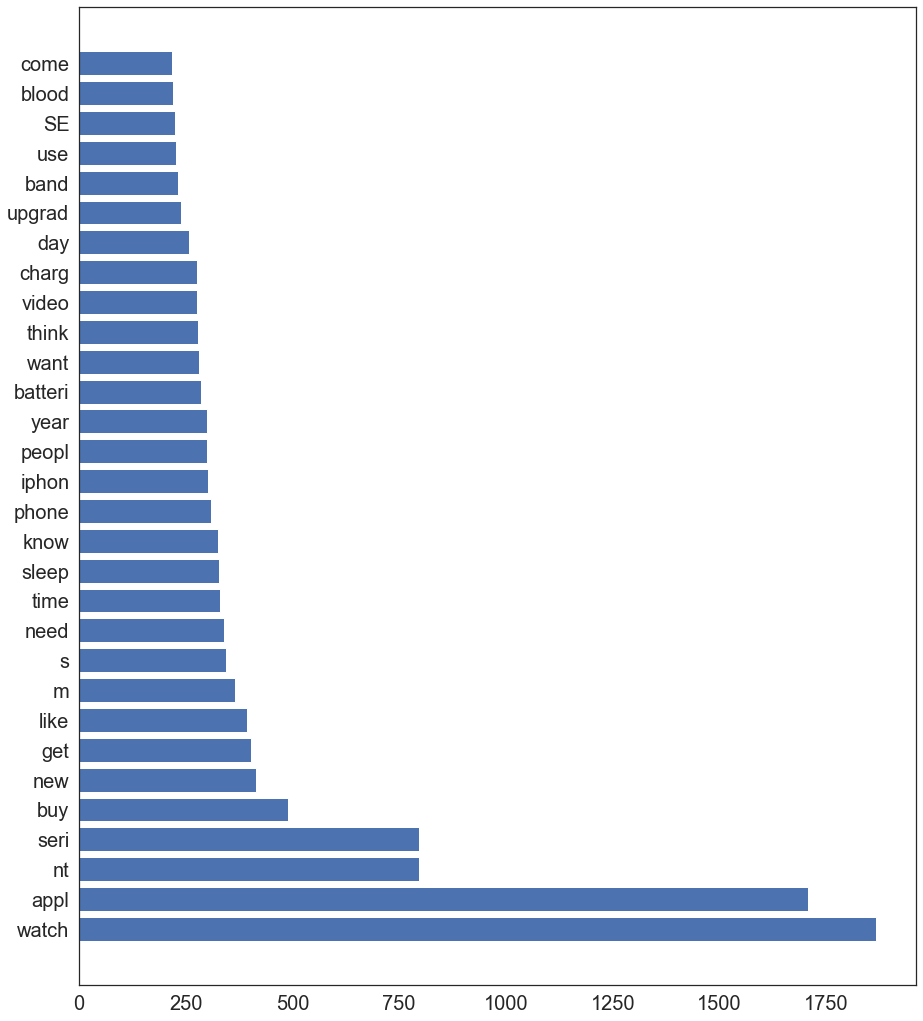

In [177]:
nterms = 30
x = list(tf.keys())[:nterms]
y = list(tf.values())[:nterms] # python 3.7 and greater retains dictionary order

fig, axs = plt.subplots(figsize=(15,18), constrained_layout=False)
axs.barh(y=x, width=y)
for label in axs.get_yticklabels(): # rotate timestamp ticks
    label.set_fontsize(20)
for label in axs.get_xticklabels(): # rotate timestamp ticks
    label.set_fontsize(20)

### Inverse Document Frequency (IDF)¶
Weights words by their relative frequency across positive and negative to find unique word trends that identify and categorize each word accordingly.

In [178]:
stop_words = set(stopwords.words('english'))
tfidf = TfidfVectorizer(sublinear_tf=True,
                        analyzer='word',
                        max_features=100,
                        tokenizer=word_tokenize,
                        stop_words=stop_words)

In [179]:
negative_watch = watch_neg['textOriginal'].to_list()
positive_watch = watch_pos['textOriginal'].to_list()

# lowercase text
negative = list(map(str.lower, negative_watch))
positive = list(map(str.lower, positive_watch))

# remove punctuation
for c in string.punctuation:
    negative = str(negative).replace(c, "")
    positive = str(positive).replace(c, "")

# get list of two documents together
corpus = [str(negative), str(positive)]

In [180]:
watch_tfidf = pd.DataFrame(tfidf.fit_transform(corpus).toarray())
watch_tfidf.columns = tfidf.get_feature_names()
watch_tfidf = watch_tfidf.rename(index={0:'Negative', 1:'Positive'})

In [181]:
keep_cols = set(watch_tfidf.columns.to_list()) - set(['apple', 'watch', 'series', 'thank', 'thanks','great', 'iphone', '’','phone','”','“', '12', 'one', 'like', 'get', 'im', 'new', 'dont', 'still', 'phones', 'really', 'want', 'even', 'would', 'need', 'much', 'next', 'go' , 'going', 'every', 'back', 'iphones', 'getting', 'also', 'good', 'life', 'thing', 'way', 'thats', 'give', 'got', 'think', 'know', 'cant', 'make', 'na', 'use', 'u', 'lol', 'pro', 'max', 'please','video', 'best', 'review', 'time', 'people' ])
watch_tfidf = watch_tfidf.loc[:, keep_cols]

In [182]:
most_unique = watch_tfidf.idxmax(axis=1) 
most_unique

Negative    6
Positive    6
dtype: object

In [183]:
tpose = watch_tfidf.transpose()
tpose['Compound'] = tpose['Positive'] - tpose['Negative']


pos_idf = tpose.loc[tpose.Compound > 0, :]
neg_idf = tpose.loc[tpose.Compound <0, :]

### Top Positive terms used associated with Watch Series 6.¶

Positively associated terms with the apple watch 6 allow us to observe that the device has a nice value for its cost, and a nice appearance, specifically targeting its lineup of colors.

In [184]:
pos_idf.sort_values(by = 'Compound',ascending = False)['Compound'].head(15)

love      0.034373
nice      0.029747
save      0.022845
smart     0.015879
better    0.015788
well      0.008077
looks     0.007433
blue      0.007265
videos    0.006906
keep      0.005524
worth     0.004483
work      0.002868
right     0.002707
red       0.002212
say       0.002175
Name: Compound, dtype: float64

### Top negative terms used associated with Watch Series 6.

Negatively associated terms with the device seem to target the device’s sleep function, a lack of a charging brick, battery size, and general lack of typical fitness features such as oxygen and blood measurements.

In [185]:
neg_idf.sort_values(by = 'Compound',ascending = True)['Compound'].head(15)

sleep       -0.014620
charger     -0.013746
never       -0.008681
blood       -0.008339
buy         -0.007794
battery     -0.007317
charge      -0.006550
oxygen      -0.006314
year        -0.006045
wrist       -0.005565
samsung     -0.005517
product     -0.004892
price       -0.004687
band        -0.004299
something   -0.004148
Name: Compound, dtype: float64

## Major Events Affecting Apple Stock:
Key events to note:
 * Septmber 15,2020, Apply watch Series 6, Apple watch SE, Apple fitness +, iPad Air and iPad, Apple one plan
 * October 13, 2020 Keynote Release event for iPhone
 * October 13, 2020 iphone 12 / 12 pro released
 * Apple 12 Pro max release November 6th, 12 mini November 13, 12 October 23, 12 Pro November 13 2020
 * Apple Events: November 10 2020, Macbook M1 Processors released

 
The group anticipated that major changes in sentiment could be detected on these days, however, after further investigation it appears that discussion around these events did not quite extend to YouTube and was most likely confined to platforms focused on discussons such as Reddit and Twitter. 

### Time Series Plots
Visualize any correlations between video comments and stock price for a given time period. <br> <br>
The plot indicates there is an overall upward trend of both the compound scores and stock adjusted close price. It's clear that there are gaps in sentiment analysis, thus, the next steps would be to collect more comments from videos. 

[*********************100%***********************]  1 of 1 completed


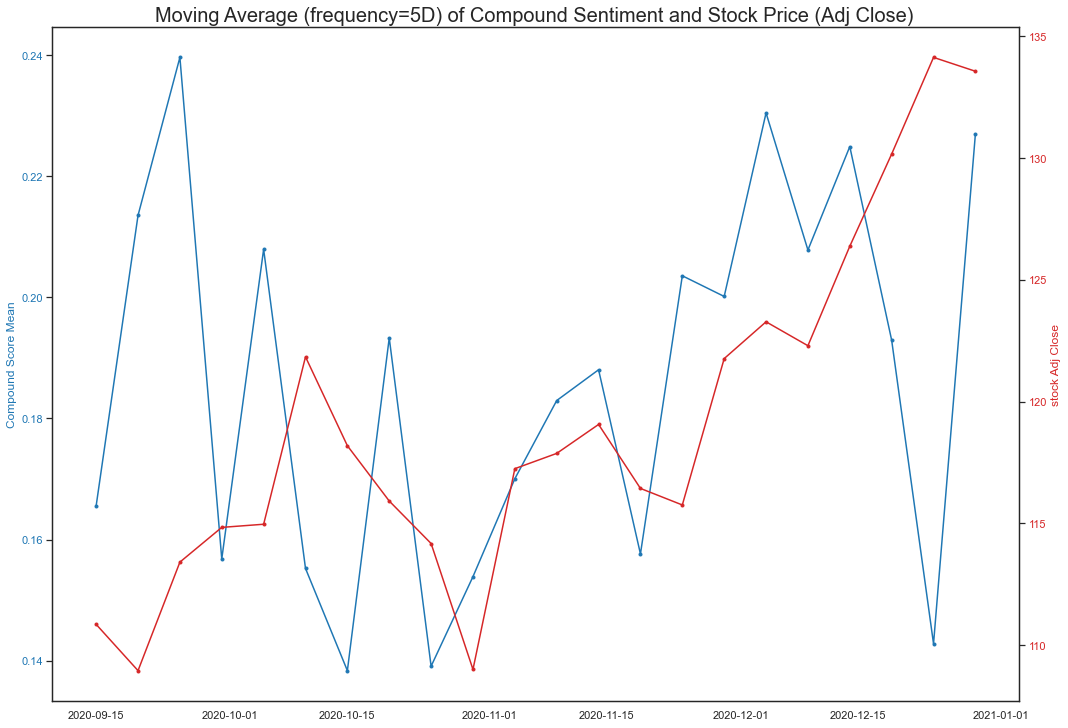

In [198]:
###### Parameters
freq = '5D'
stock_feature = 'Adj Close'

###### begin plots
fig, ax1 = plt.subplots(figsize=(15,10))
fig.suptitle(f'Moving Average (frequency={freq}) of Compound Sentiment and Stock Price ({stock_feature})', \
             fontsize=20, y=1.01)
sentiment_means = comments.loc[(comments.publishedAt >= dt.datetime.combine(epoch, datetime.min.time())) & \
                               (comments.publishedAt < dt.datetime.combine(eschaton, datetime.min.time())),\
                               :].groupby(pd.Grouper(key='publishedAt', freq=freq)).mean()
color = 'tab:blue'
ax1.set_ylabel('Compound Score Mean', color=color)  # we already handled the x-label with ax1
ax1.plot(sentiment_means.index, sentiment_means['compound'], '.-', color=color, label=f'stock {stock_feature}')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

### Retrieve stock data
yf.pdr_override()
company_symbol = "AAPL" # Example Apple stock price
stocks = pdr.get_data_yahoo("AAPL", start=epoch, end=eschaton) # stupid output can't be silenced
stock_means = stocks.groupby(pd.Grouper(freq=freq)).mean()
color = 'tab:red'
ax2.set_xlabel('Date')
ax2.set_ylabel(ylabel=f'stock {stock_feature}', color=color)
ax2.plot(stock_means.index, stock_means[stock_feature], '.-', color=color, label=f'stock {stock_feature}')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

for label in axs.get_xticklabels(): # rotate timestamp ticks
    label.set_rotation(70)
    label.set_horizontalalignment('right')
    


The graph above shows little to no correlation between the overall sentiment of the YouTube videos comments and the stock market. Nonetheless, there is a common upwards movement for both the overall sentiment and the stock market. This happened between the period of November-December in the year 2020. This movement reflects a positive sentiment in reaction to the release of the M1 processors for the Mac mini and lower-end Macbook products. The overall trend reflects the general acceptance of this reform in the Apple products formerly mentioned.

### Comments and Video Release Time Series
Ideally, each day within the time period would have an equal number of comments sufficiently large as to garner an accurate daily understanding of the sentiment. 

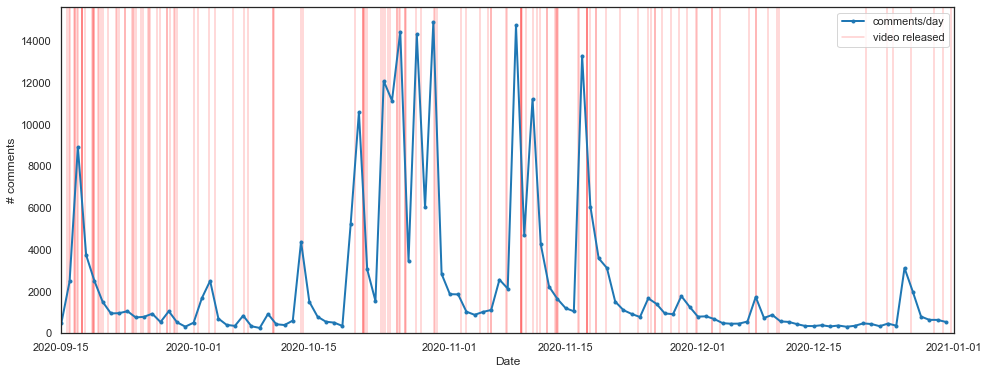

In [187]:
###### Parameters
freq = '1D'
count = comments.groupby(pd.Grouper(key='publishedAt', freq=freq)).count()
###### begin plots
fig, ax1 = plt.subplots(figsize=(16,6))

color = 'tab:blue'
ax1.plot(count.index, count['videoId'], '.-', color=color, label='comments/day', linewidth=2)
ax1.set(xlabel='Date', ylabel='# comments')
ax1.set_ylim(0)
ax1.set_xlim((epoch,eschaton))

legend = False
for index, row in videos_df.iterrows():
    ax1.axvline(x=row['publishedAt'], color='red', label='video released', linewidth=1.5, alpha=0.2, zorder=0)
    if not legend:
        ax1.legend(loc='best')
        legend=True

### Comment Frequency - Exponential Backoff 

The following plot illustrates the exponential decay for mean comment count per day. This is intended to convey the difficulties experienced when collecting comments to utilize as an accurate sample of consumer sentiment about a company. 

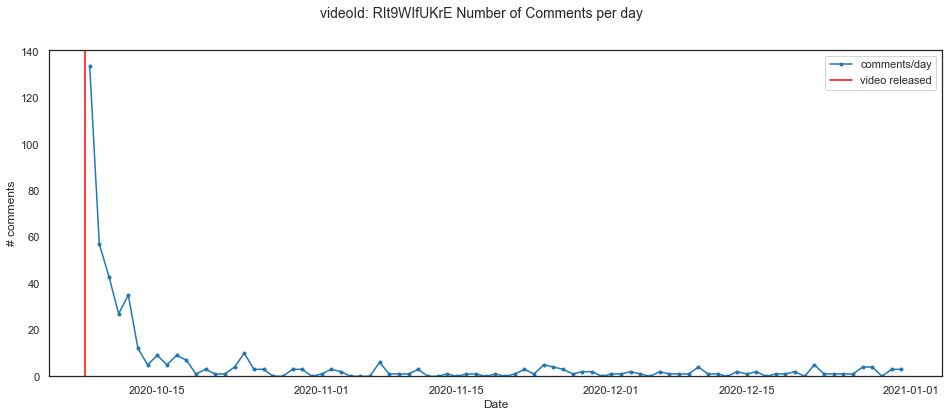

In [188]:
###### Parameters
freq = '1D'
sample_vid = videos_df.sample(1, random_state=1)
count = comments.loc[(comments.videoId == sample_vid.index[0]), \
                     :].groupby(pd.Grouper(key='publishedAt', freq=freq)).count()

count = count.loc[sample_vid.publishedAt[0]:, :]
###### begin plots
fig, ax1 = plt.subplots(figsize=(16,6))

color = 'tab:blue'
# ax1.set_ylabel('count', color=color)
ax1.plot(count.index, count['videoId'], '.-', color=color, label='comments/day')
ax1.set(xlabel='Date', ylabel='# comments')
ax1.set_ylim(0)
# ax1.set_xlim((sample_vid['publishedAt'],eschaton))
# ax1.tick_params(axis='y', labelcolor=color)
ax1.axvline(x=sample_vid['publishedAt'], color='red', label='video released', linewidth=1.5, alpha=1, zorder=0)
ax1.legend(loc='best')
nothing = fig.suptitle(f"videoId: {sample_vid.index[0]} Number of Comments per day", fontsize=14)

### Feature Correlation
How do the numerical values of the comments correlate with the stock price?

Results: There is a minor positive correlation between Adj Close (stock price) and the compound score. Therefore, utilizing a predictive model to forecast stock price based upon YouTube comment sentiment about a company (Apple) would most likely not yield fruitful results. The surpising result is that the `neu` value is inversely correlated with `Adj Close`.

In [206]:
freq = '1d'
stock_means = stocks.groupby(pd.Grouper(freq=freq)).mean()
sentiment_means = comments.loc[(comments.publishedAt >= dt.datetime.combine(epoch, datetime.min.time())) &\
                               (comments.publishedAt < dt.datetime.combine(eschaton, datetime.min.time()))\
                               ,:].groupby(pd.Grouper(key='publishedAt', freq=freq)).mean()
corr_df = sentiment_means.loc[:,['likeCount', 'wordCount', 'neg', 'neu', 'pos', 'compound']\
                             ].join(stock_means.loc[:,stock_feature], how='inner')
corr_df.corr()

,likeCount,wordCount,neg,neu,pos,compound,Adj Close
likeCount,1.000000,-0.228302,0.269508,0.155741,-0.283444,-0.396287,-0.169998
wordCount,-0.228302,1.000000,0.095894,0.107775,-0.108375,0.200831,0.246033
neg,0.269508,0.095894,1.000000,0.002746,-0.497247,-0.692122,0.126471
neu,0.155741,0.107775,0.002746,1.000000,-0.858098,-0.569290,-0.465408
pos,-0.283444,-0.108375,-0.497247,-0.858098,1.000000,0.843746,0.369825
compound,-0.396287,0.200831,-0.692122,-0.569290,0.843746,1.000000,0.290336
Adj Close,-0.169998,0.246033,0.126471,-0.465408,0.369825,0.290336,1.000000


## OLS Model Summary

Took top 3 features that correlated most with Adj Close prices and utilized them to create a multivariate model.

In [207]:
import patsy
import statsmodels.api as sm
corr_df.rename(columns={'Adj Close' : 'Adj_Close'}, inplace=True)
outcome_2, predictors_2 = patsy.dmatrices('Adj_Close ~ neu + pos + compound', corr_df) # create design matrices
results = sm.OLS(outcome_2, predictors_2).fit() # init OLS model
results.summary()
# fit OLS model
# check summary for results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj_Close   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     8.161
Date:                Mon, 15 Mar 2021   Prob (F-statistic):           9.50e-05
Time:                        19:25:15   Log-Likelihood:                -242.08
No. Observations:                  76   AIC:                             492.2
Df Residuals:                      72   BIC:                             501.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    419.7800     96.767      4.338      0.000     226.879     612.681
neu         -342.2357    102.711     -3.332      0.001    -546.986    -137.486
pos         -270.6715    143.244     -1.890      0.063    -556.222      14.879
compound      65.0458     39.168      1.661      0.101     -13.034     143.126
==============================================================================
Omnibus:                        3.535   Durbin-Watson:                   0.547
Prob(Omnibus):                  0.171   Jarque-Bera (JB):                2.757
Skew:                           0.356   Prob(JB):                        0.252
Kurtosis:                       3.603   Cond. No.                         374.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

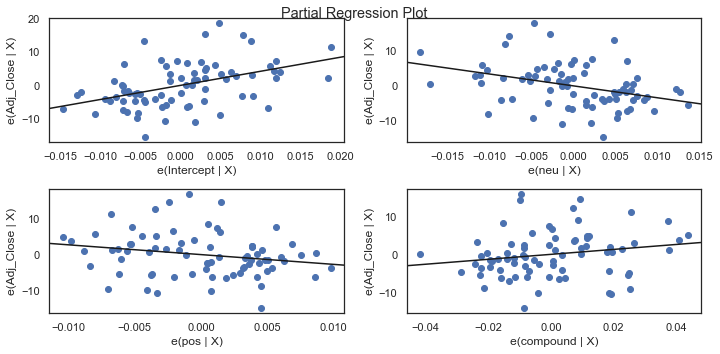

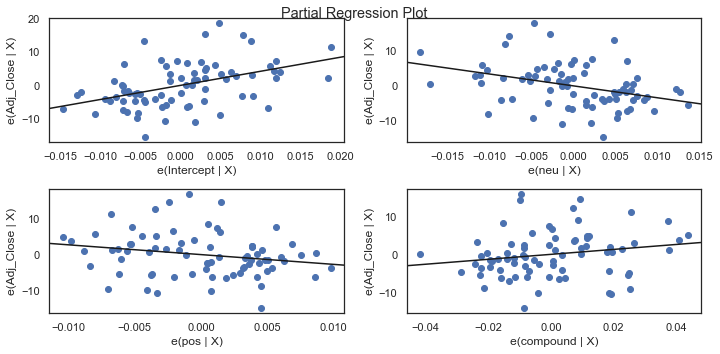

In [208]:
sm.graphics.plot_partregress_grid(results)

## Model Results

The R-squared value shows a poor model fit which would indicate poor predicitions for future stock prices.

# Ethics & Privacy


   All data collected was made voluntarily available by users when they decided to post comments on Youtube videos. However, this is not a universal sign of consent, and thus data will be anonymized in an effort to maintain the highest possible degree of privacy for users who become a part of the dataset, considering there is no explicit individual consent given when their data is collected.

   Furthermore, the usernames and channel ids of comment authors have no importance in the given analyses that will be performed, and will thus remain private in any future observations/visuals/statistics done for the project,thereby also protecting the anonymity of the users from whom we have collected data. In addition to this, reviewing YouTubes Terms of Services we can see that because we are not using their services for commercial use,  on behalf of a third party and nor are we using their services in such a manner that would cause harm to any user, other third party, YouTube or their Affiliates we can conclude that we are well within the moral and ethical guidelines that YouTube has outlined in their term of services: https://www.youtube.com/static?template=terms

   Overall we can conclude that using this data for our intended analysis does not pose any major breach of data privacy or ethical concerns. Biases in this project will come down to any human decisions that need to be made for the sake of removing complexity in development. This will be things such as manually determining which videos to scrape, instead of automating that process. Or developing the analysis in a flawed way. The only way we can account for this is to make sure there is enough volume behind our decisions (enough videos chosen) or to put extra effort into verifying code to remove human biases.
    
   Another factor that could have caused  biases in our data is the fact that a lot of this data was acquired during the time of the Covid-19 Pandemic. There could have been a rise in impulse buys. Furthermore we also know that during the height of the pandemic many users were not actually able to physically walk into an apple store and actually test the product that they were going to buy. As a result, this could have led to a weaker sentiment expressed by consumers than normal for their products: https://www.washingtonpost.com/technology/2020/04/30/apple-earnings-coronavirus/

   Considering the stakeholders involved here, the primary group that stands to benefit from this analysis are the companies (as well as their respective investors) whose products’ sentiments we are analyzing. If our analysis were to show that there is indeed a strong correlation between the sentiments and a change in stock values, then companies could attempt to use this information for nefarious purposes. For example they could propagate false sentiments online through bot accounts in an attempt to artificially manipulate the value of their stocks (similar to what the Chinese government has been documented doing in the past:https://techcrunch.com/2020/09/22/facebook-gans-takes-down-networks-of-fake-accounts-originating-in-china-and-the-philippines/). Another factor to consider would be the fact that all of the data that we have collected is freely available to Google who owns YouTube. This could mean that if Google felt that our hypothesis was true they could use the data for some possible nefarious purposes if they should so choose, maybe trying to manipulate the value of certain companies stocks.


# Conclusion & Discussion

Due to a lack of data, scope, and thus experimental rigor, we cannot accept our hypothesis as true. That is to say, there is not enough information to substantiate a claim that goes in either direction. By extension, our model does not currently serve as a credible basis for generating a predictive analysis on the market.

That aside, we have still demonstrated that this type of analysis does indeed have value, in that our TF-IDF analyses actually seem to empirically substantiate the “consensus” on these products that can be gathered from hearsay; thus providing a more scientific approach for gathering information that is usually reliant on gossip and spoken word.

### Comment Frequency
The act of scraping comments was entirely underestimated and was eventually recognized as an issue because the daily mean comment count variance is too high. An ideal data set would have roughly the same mean comments per day allowing for a more consistent sample of mean sentiment. Collecting comments is difficult due to the exponential backoff for comments/day on a single video. When a video is first released the comment rate is at its highest, however as time progreses this rate exponentially decays, thus, there would need to be a drastic number of videos scraped to reduce the comment frequency variance. 

### Pitfalls of VADER
First and foremost, VADER doesn't handle contemporary language very well. For example, `That daft punk poster is so freaking rad` has a compound score of -0.5598 despite the comments clear intention to compliment the daft punk poster. Furthermore, sarcasm and other contextually dependent language (memes) are hard to quantify in a programmatic manner. It would be better to train a Decision Tree Classification model to determine if a comment is positive or negative. The ideal training set for this model would have a large portion of its training data including contemporary language. 


# Team Contributions

Taranjot Singh Samra : Team lead, used Vader and NLTK to create Sentiment Analysis to run Product Analysis, Visualizations, Tf-IDF Analyizations.

Jaycob Carswell : NLTK, visualizations, writeups/analysis.

Karam Singh : Descriptions and write up.

Daniel Sandoval : Textblob analysis, Hypothesis, descriptions for plots.

Nathan Krause : Database design, created scraping module, ran OLS correlation analysis, time-series visualizations.